In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.accelerometer import plot_fourier_transformation, plot_acceleration, plot_feature_columns, accelerometer_feature_engineering
from src.kmeans import kmeans
from src.principal_component_analysis import principal_component_analysis, plot_principal_component_analysis
from src.decision_tree import decision_tree
from src.device_handling import split_by_device
from src.plotting import box_plot_columns
from src.time_series import align_sequences_to_same_length, median_filter, run_time_series_algorithms
from src.ml_util import run_feature_algorithms
from src.pandas_util import correlation_matrix

2023-01-13 09:17:13.579415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drift_df = pd.read_csv('drift_accelerations.csv')
drift_df = drift_df[drift_df['age_group']!=0]

In [4]:
drift_df.head(5)

,subject,age_group,file,uuid,hand,device,time_stamp,duration,x,y,z,mag
0,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911656908,0,-1140,730,3992,4215.277452
1,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911656962,54,-1376,1102,4072,4437.224808
2,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911656992,84,-1194,1036,3326,3682.554548
3,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911657021,113,-1806,674,3148,3691.316296
4,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911657052,144,-1642,804,2964,3482.510014


In [5]:
drift_df.describe()

,age_group,time_stamp,duration,x,y,z,mag
count,396122.000000,3.961220e+05,396122.000000,396122.000000,396122.000000,396122.000000,396122.000000
mean,41.148434,1.671800e+12,35944.507445,-2305.636309,330.210056,-3375.756555,4431.466144
std,9.933849,9.959953e+08,29636.151100,657.227051,1318.400844,866.610294,322.447014
min,30.000000,1.670254e+12,0.000000,-21346.000000,-32000.000000,-15822.000000,347.182949
25%,30.000000,1.670954e+12,13626.250000,-2768.000000,-864.000000,-3914.000000,4242.578108
50%,50.000000,1.672049e+12,27281.500000,-2384.000000,424.000000,-3444.000000,4433.550045
75%,50.000000,1.672762e+12,54117.750000,-1950.000000,1543.500000,-2900.000000,4631.561400
max,50.000000,1.673274e+12,132468.000000,7576.000000,14300.000000,8304.000000,38466.989952


In [6]:
single_session_df = drift_df[drift_df['uuid'] == drift_df['uuid'].unique()[1]]

In [7]:
single_sessions_devices_df = split_by_device(single_session_df)

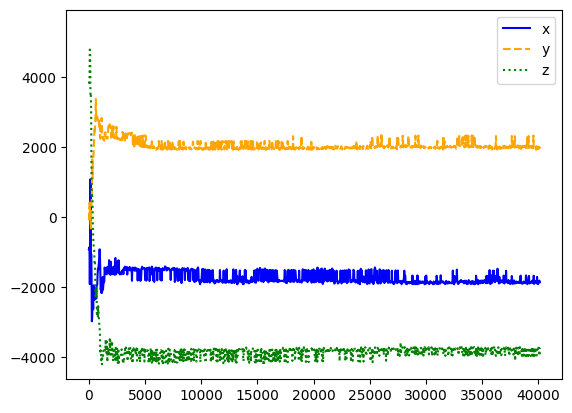

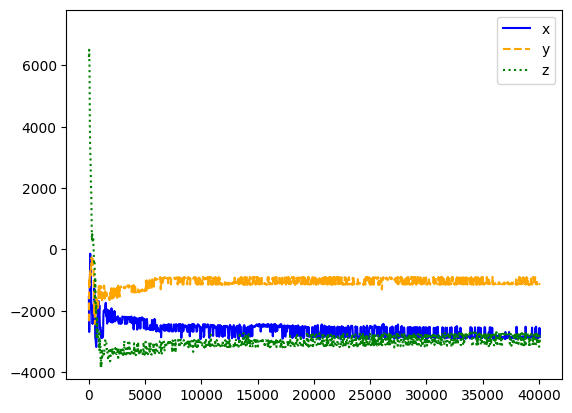

In [8]:
plot_acceleration(single_sessions_devices_df, subplots=False)

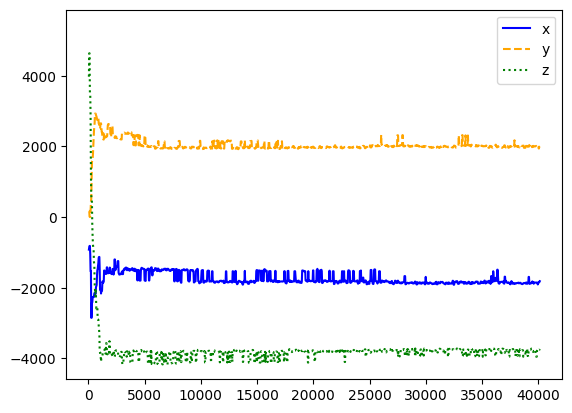

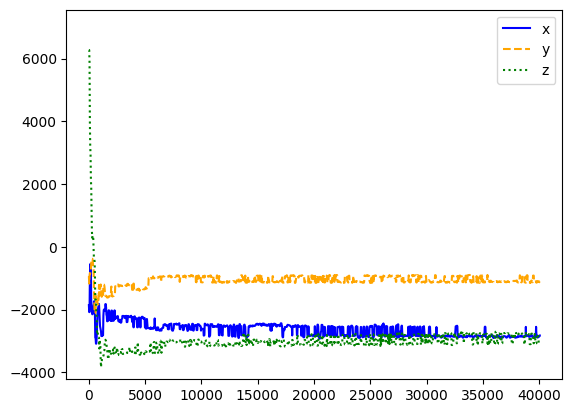

In [9]:
single_session_df = median_filter(single_session_df)
single_sessions_devices_df = split_by_device(single_session_df)
plot_acceleration(single_sessions_devices_df, subplots=False)

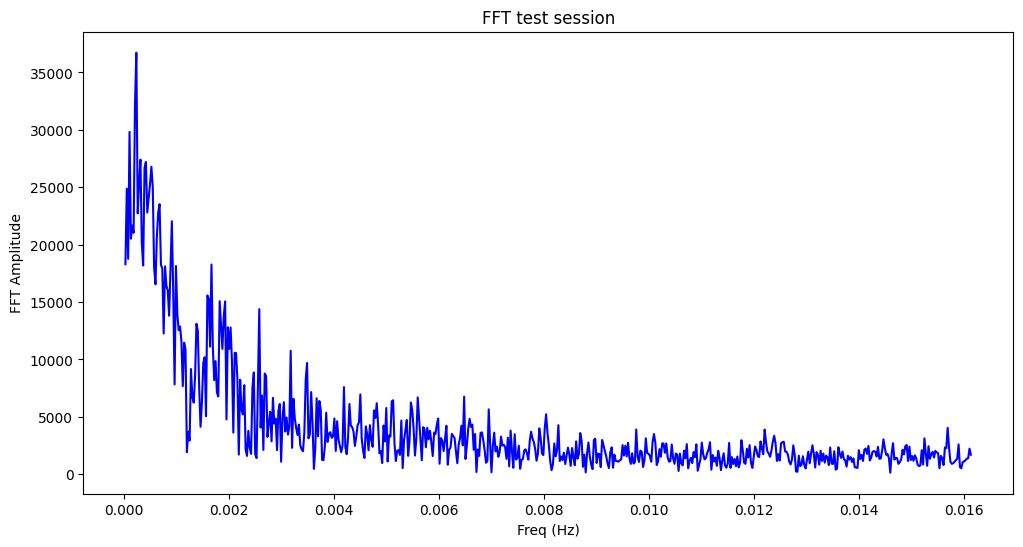

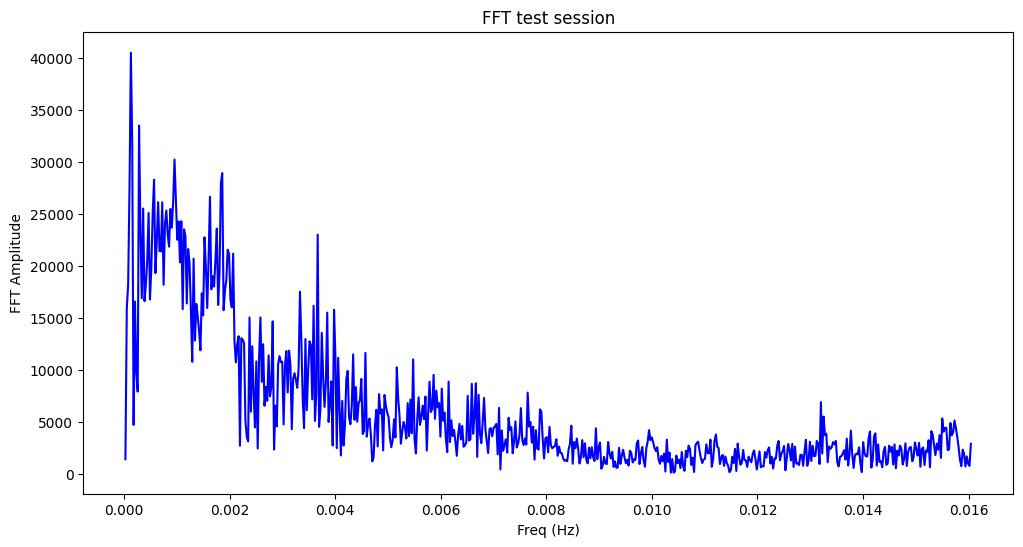

In [10]:
plot_fourier_transformation(single_sessions_devices_df, 'test session')

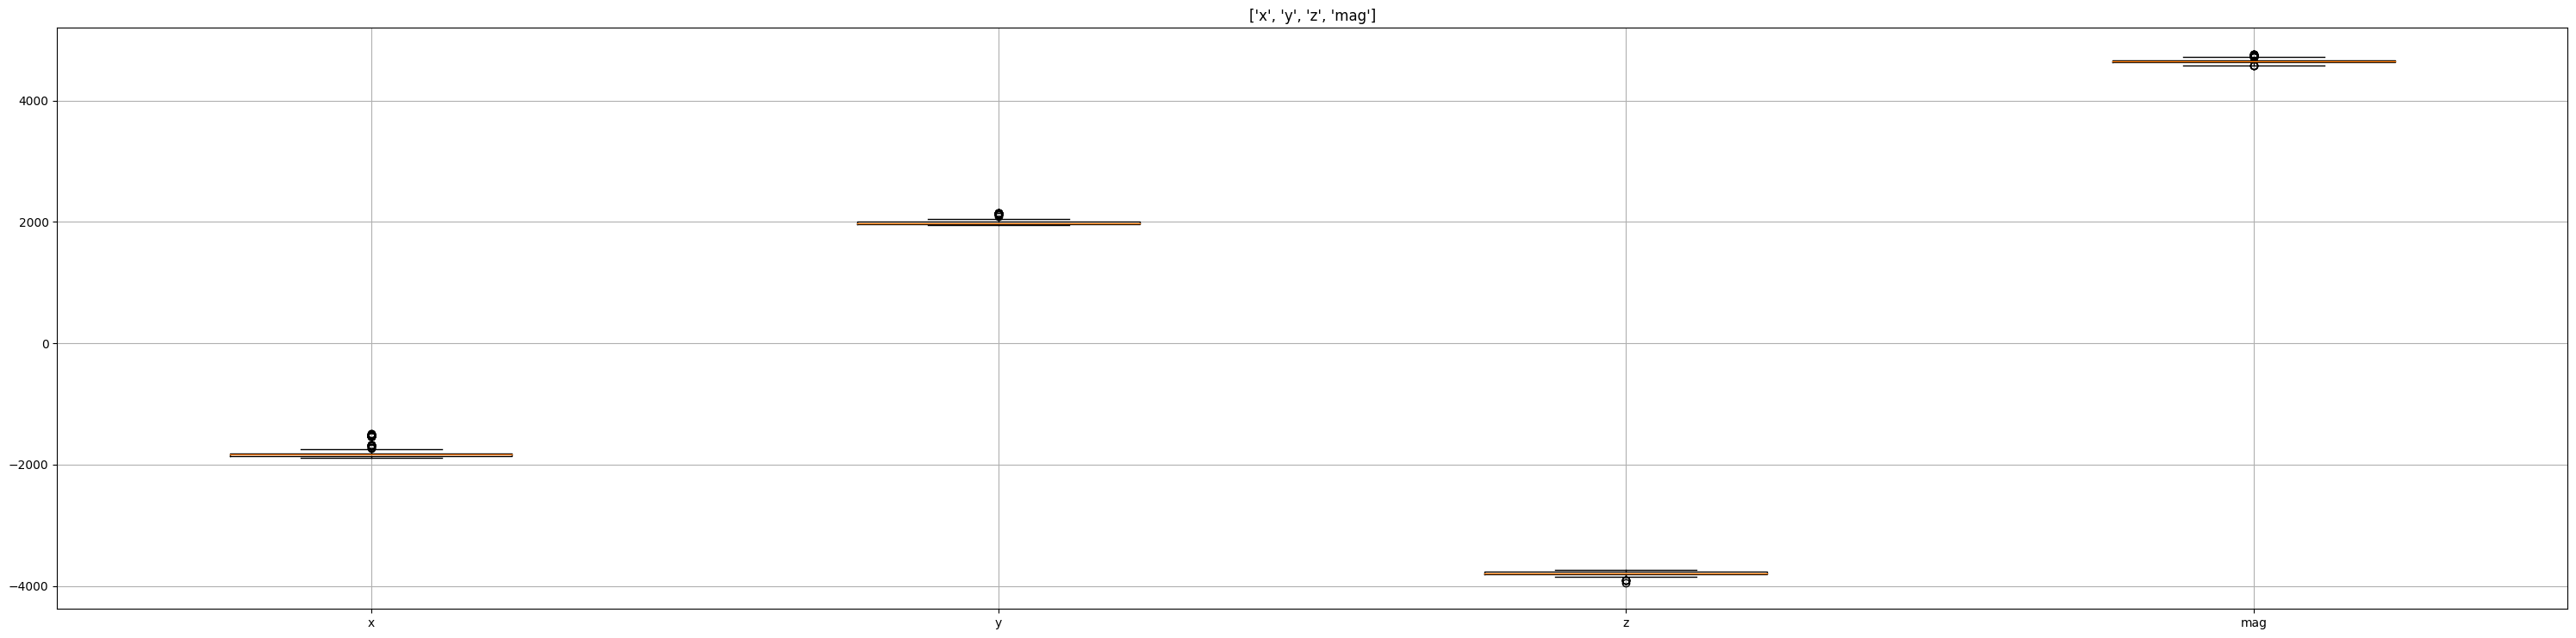

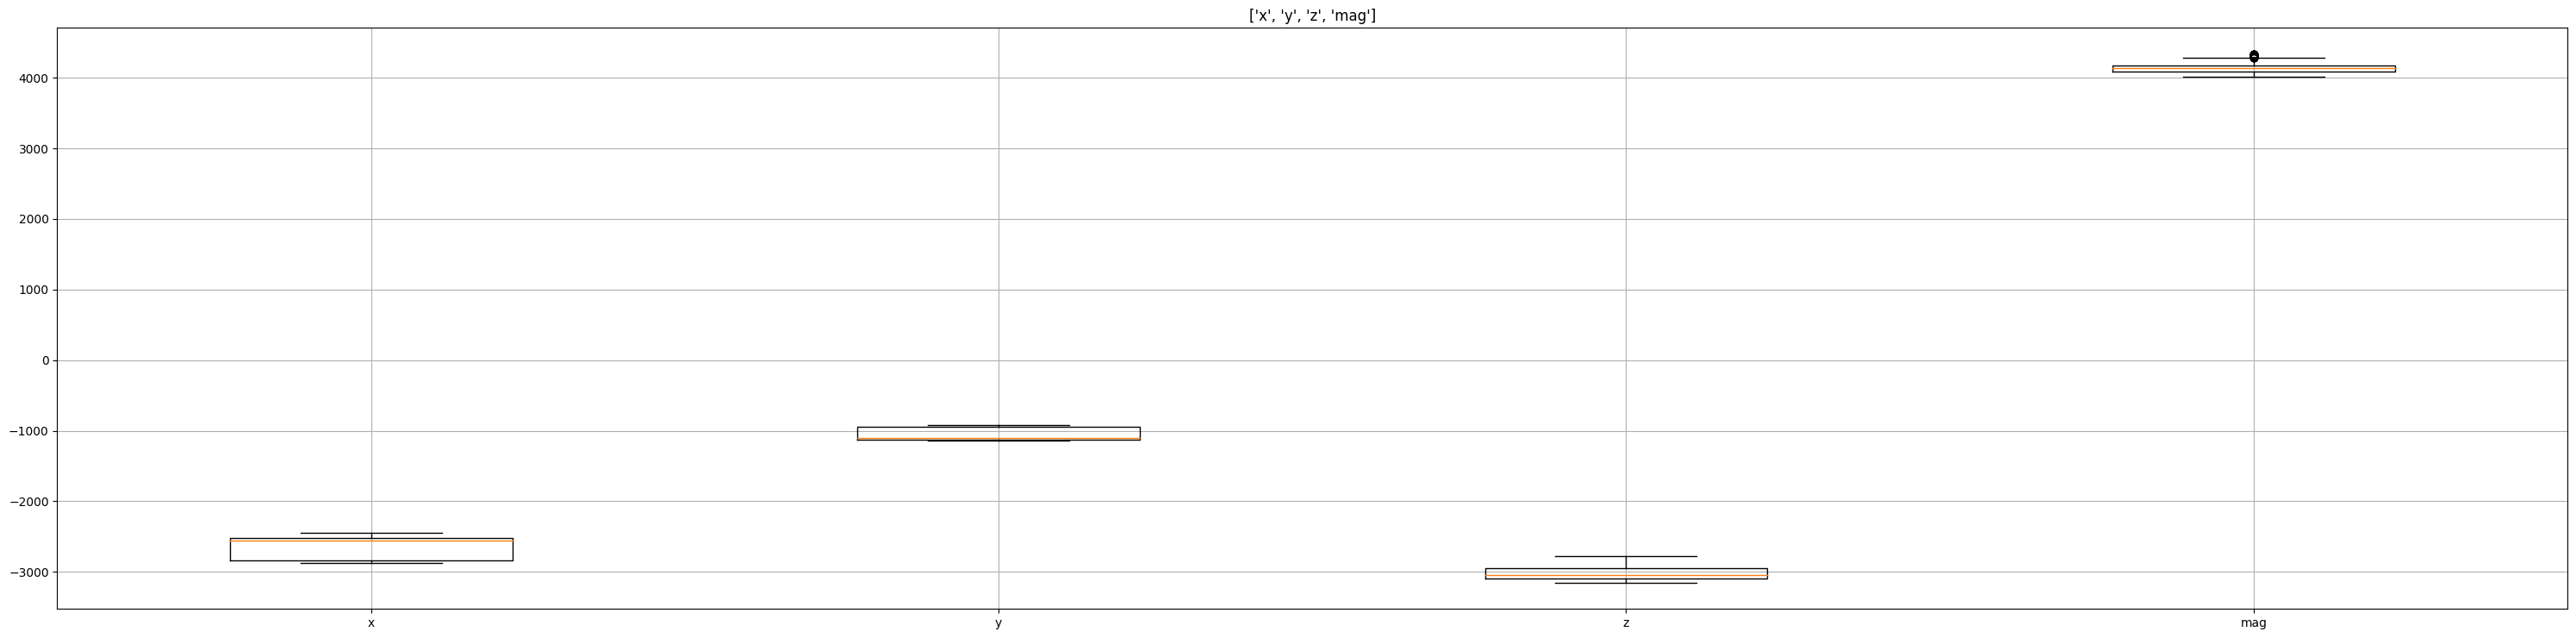

In [11]:
box_plot_columns(single_sessions_devices_df)

In [12]:
drift_filtered_df = pd.DataFrame(columns=drift_df.columns)
for device in drift_df['device'].unique():
    device_df = drift_df[drift_df['device']==device]
    device_filtered_df = median_filter(device_df)
    drift_filtered_df = pd.concat([drift_filtered_df, device_filtered_df])
drift_filtered_df.head()

,subject,age_group,file,uuid,hand,device,time_stamp,duration,x,y,z,mag
1,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911656962,54,-1194.0,1036.0,3992.0,4215.277452
2,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911656992,84,-1376.0,1036.0,3326.0,3691.316296
3,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911657021,113,-1642.0,804.0,3148.0,3682.554548
4,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911657052,144,-1642.0,674.0,2964.0,3482.510014
5,50-10-01,50,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,6d3ce844-526d-4999-bd59-9c0ae5e2288c,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,1672911657082,174,-1420.0,804.0,2440.0,2867.054237


In [13]:
drift_processed_df = accelerometer_feature_engineering(drift_filtered_df)
drift_processed_df = drift_processed_df.reset_index(drop=False)
drift_processed_df = drift_processed_df.drop('hand', axis=1)
drift_processed_df = drift_processed_df.drop('device', axis=1)
drift_processed_df.head()

,age_group,subject,uuid,x_std,y_std,z_std,mag_std,x_mean,y_mean,z_mean,mag_mean,x_sem,y_sem,z_sem,mag_sem,x_peaks,y_peaks,z_peaks,mag_peaks,x_sal,y_sal,z_sal,mag_sal,duration,x_snr,y_snr,z_snr,mag_snr
0,30,30-01-01,260e9cfc-928c-4305-bfbd-2363e67bec66,139.132880,129.878253,360.674592,189.915099,-2538.389023,1778.802260,-3223.354318,4486.114857,3.952702,3.689783,10.246603,5.395402,527,600,547,511,-2.525708,-2.409433,-2.352179,-2.398155,40138,-18.244350,13.695921,-8.937015,23.621686
1,30,30-01-01,465c2bf2-e3c3-4c3f-abc2-803c9d815382,243.110341,258.454579,462.103337,284.782817,-2520.958599,1803.407643,-3213.833599,4498.376882,4.850579,5.156730,9.219965,5.682036,1140,1198,1070,1007,-2.354757,-2.489840,-2.538848,-2.381842,91706,-10.369607,6.977658,-6.954794,15.795816
2,30,30-01-01,73006af4-0d2a-4de4-a641-478eba38b6f2,158.451695,350.562363,296.372509,317.903863,-2524.556184,1856.557801,-3340.640259,4597.342572,4.505179,9.967367,8.426613,9.038804,552,592,520,521,-2.331180,-2.428645,-2.510308,-2.502568,40138,-15.932655,5.295942,-11.271762,14.461424
3,30,30-01-01,260e9cfc-928c-4305-bfbd-2363e67bec66,226.463193,227.381998,282.089174,177.374334,-2014.871878,-1669.613215,-3324.620467,4249.074496,6.428531,6.454613,8.007566,5.035063,527,553,524,510,-2.419921,-2.290985,-2.326198,-2.503581,40076,-8.897127,-7.342768,-11.785707,23.955408
4,30,30-01-01,465c2bf2-e3c3-4c3f-abc2-803c9d815382,196.656898,177.244468,374.931119,170.112753,-1931.193805,-1637.933280,-3402.363781,4263.157690,3.919055,3.532196,7.471772,3.390073,1032,1202,1059,1036,-2.376710,-2.391737,-2.557916,-2.437768,91707,-9.820117,-9.241097,-9.074637,25.060777


In [14]:
def drift_features(df):
    entries = []
    for uuid in df['uuid'].unique():
        current_df = df[df['uuid'] == uuid]
        entry = {}
        entry['age_group'] = current_df['age_group'].unique().max()
        entry['subject'] = current_df['subject'].unique().any()
        entry['uuid'] = current_df['uuid'].unique().any()
        entry['file'] = current_df['file'].unique().any()
        entry['duration'] = current_df['duration'].max()
        session_devices = split_by_device(current_df)
        device_count = 0
        for device_df in session_devices:
            device_processed_df = accelerometer_feature_engineering(device_df)
            device_processed_df = device_processed_df.drop(columns=['x_sem', 'y_sem', 'z_sem', 'mag_sem','duration'])
            suffix = f'_{device_count}'
            device_count += 1
            device_processed_df.columns += suffix
            for column in device_processed_df.columns:
                entry[column]=device_processed_df[column].max()
        entries.append(entry)
    return pd.DataFrame(entries)

In [15]:
def calc_device_diffs(df, columns):
    local_df = df.copy()
    new_suffix = '_diff'
    processed_columns = []
    for column in columns:
        column_without_suffix = column.removesuffix('_0').removesuffix('_1')
        if column_without_suffix not in processed_columns:
            processed_columns.append(column_without_suffix)
            new_column = column_without_suffix + new_suffix
            column_device_1 = column_without_suffix+'_0'
            column_device_2 = column_without_suffix+'_1'
            local_df[new_column] = local_df[column_device_1]-local_df[column_device_2]
            local_df = local_df.drop(columns=[column_device_1, column_device_2])
    return local_df

In [16]:
feature_device_based_df = drift_features(drift_filtered_df)
feature_device_based_df = calc_device_diffs(feature_device_based_df,feature_device_based_df.columns[5:])
feature_device_based_df.head()

,age_group,subject,uuid,file,duration,x_std_diff,y_std_diff,z_std_diff,mag_std_diff,x_mean_diff,y_mean_diff,z_mean_diff,mag_mean_diff,x_peaks_diff,y_peaks_diff,z_peaks_diff,mag_peaks_diff,x_sal_diff,y_sal_diff,z_sal_diff,mag_sal_diff,x_snr_diff,y_snr_diff,z_snr_diff,mag_snr_diff
0,50,50-10-01,6d3ce844-526d-4999-bd59-9c0ae5e2288c,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,87559,28.056133,46.021868,124.729945,96.799527,932.221291,3339.018081,-1063.871036,657.267053,-15,15,14,-55,-0.039479,-0.227991,-0.100448,-0.044763,6.045854,12.817971,-0.683293,-4.335155
1,50,50-10-01,9ead05b5-3723-46a5-9162-1c3717041122,9ead05b5-3723-46a5-9162-1c3717041122.json,40101,-64.768357,44.459728,28.026019,-51.732001,889.894185,3100.776505,-800.519216,511.392401,10,-28,15,-4,-0.117938,0.321459,-0.151209,0.000551,1.082435,16.090349,-1.023459,7.297522
2,50,50-10-01,e85379f4-7e13-49f2-b8f2-64e7ac1a44fa,e85379f4-7e13-49f2-b8f2-64e7ac1a44fa.json,40103,-8.347809,-15.565138,5.402227,37.382647,809.910754,3443.497974,-735.159120,617.571368,-4,44,23,18,-0.005586,-0.100769,0.057514,0.008752,4.301491,21.156865,-3.775333,-5.905751
3,50,50-10-01,5b7cb6c5-2d44-4c59-93a2-bdd8504af4ef,5b7cb6c5-2d44-4c59-93a2-bdd8504af4ef.json,40102,17.815398,105.921582,91.976804,176.301299,926.965644,3165.422203,-989.768224,622.722993,14,28,29,-46,-0.084209,-0.125351,0.106184,0.017883,5.990037,13.277486,-0.819375,-8.844623
4,50,50-10-01,23b072a2-4503-47bb-aabb-36fb505589b0,23b072a2-4503-47bb-aabb-36fb505589b0.json,91521,56.460072,-21.419146,-110.990207,-19.385552,710.682584,3340.046376,-751.625602,612.632203,-66,27,31,19,0.112090,-0.168519,0.130854,-0.084994,5.178196,18.157401,-5.016052,6.407965


In [17]:
drift_feature_df = feature_device_based_df.merge(drift_processed_df, on=['age_group', 'subject', 'uuid'])
drift_feature_df.head()

,age_group,subject,uuid,file,duration_x,x_std_diff,y_std_diff,z_std_diff,mag_std_diff,x_mean_diff,y_mean_diff,z_mean_diff,mag_mean_diff,x_peaks_diff,y_peaks_diff,z_peaks_diff,mag_peaks_diff,x_sal_diff,y_sal_diff,z_sal_diff,mag_sal_diff,x_snr_diff,y_snr_diff,z_snr_diff,mag_snr_diff,x_std,y_std,z_std,mag_std,x_mean,y_mean,z_mean,mag_mean,x_sem,y_sem,z_sem,mag_sem,x_peaks,y_peaks,z_peaks,mag_peaks,x_sal,y_sal,z_sal,mag_sal,duration_y,x_snr,y_snr,z_snr,mag_snr
0,50,50-10-01,6d3ce844-526d-4999-bd59-9c0ae5e2288c,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,87559,28.056133,46.021868,124.729945,96.799527,932.221291,3339.018081,-1063.871036,657.267053,-15,15,14,-55,-0.039479,-0.227991,-0.100448,-0.044763,6.045854,12.817971,-0.683293,-4.335155,219.953000,279.301120,675.946886,297.708086,-1787.141948,2117.136382,-3724.284692,4700.110175,4.385922,5.569339,13.478563,5.936379,1123,1199,1114,1020,-2.422478,-2.442412,-2.637255,-2.462998,87559,-8.125108,7.580121,-5.509730,15.787647
1,50,50-10-01,6d3ce844-526d-4999-bd59-9c0ae5e2288c,6d3ce844-526d-4999-bd59-9c0ae5e2288c.json,87559,28.056133,46.021868,124.729945,96.799527,932.221291,3339.018081,-1063.871036,657.267053,-15,15,14,-55,-0.039479,-0.227991,-0.100448,-0.044763,6.045854,12.817971,-0.683293,-4.335155,191.896867,233.279252,551.216941,200.908559,-2719.363239,-1221.881699,-2660.413656,4042.843122,3.823436,4.647956,10.982684,4.002989,1138,1184,1100,1075,-2.382999,-2.214421,-2.536807,-2.418235,87533,-14.170962,-5.237850,-4.826437,20.122802
2,50,50-10-01,9ead05b5-3723-46a5-9162-1c3717041122,9ead05b5-3723-46a5-9162-1c3717041122.json,40101,-64.768357,44.459728,28.026019,-51.732001,889.894185,3100.776505,-800.519216,511.392401,10,-28,15,-4,-0.117938,0.321459,-0.151209,0.000551,1.082435,16.090349,-1.023459,7.297522,181.774106,210.636883,652.442624,191.320559,-1748.544722,2022.657534,-3758.634972,4668.325490,5.159958,5.979275,18.520659,5.430949,547,551,547,506,-2.481003,-2.545059,-2.525292,-2.416079,40101,-9.619328,9.602580,-5.760867,24.400543
3,50,50-10-01,9ead05b5-3723-46a5-9162-1c3717041122,9ead05b5-3723-46a5-9162-1c3717041122.json,40101,-64.768357,44.459728,28.026019,-51.732001,889.894185,3100.776505,-800.519216,511.392401,10,-28,15,-4,-0.117938,0.321459,-0.151209,0.000551,1.082435,16.090349,-1.023459,7.297522,246.542463,166.177154,624.416605,243.052561,-2638.438907,-1078.118971,-2958.115756,4156.933089,6.990070,4.711521,17.703709,6.891123,537,579,532,510,-2.363065,-2.866518,-2.374083,-2.416630,40044,-10.701763,-6.487769,-4.737407,17.103021
4,50,50-10-01,e85379f4-7e13-49f2-b8f2-64e7ac1a44fa,e85379f4-7e13-49f2-b8f2-64e7ac1a44fa.json,40103,-8.347809,-15.565138,5.402227,37.382647,809.910754,3443.497974,-735.159120,617.571368,-4,44,23,18,-0.005586,-0.100769,0.057514,0.008752,4.301491,21.156865,-3.775333,-5.905751,160.299849,157.685811,166.528784,143.914723,-1622.129765,2248.499594,-3910.353609,4799.602214,4.565113,4.490669,4.742505,4.098488,571,612,573,522,-2.393061,-2.273870,-2.405341,-2.397983,40103,-10.119347,14.259365,-23.481548,33.350321


In [18]:
correlation_matrix(drift_feature_df)

/Users/timo/Documents/code/fhnw/master_thesis_analysis/src/pandas_util.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,age_group,duration_x,x_std_diff,y_std_diff,z_std_diff,mag_std_diff,x_mean_diff,y_mean_diff,z_mean_diff,mag_mean_diff,x_peaks_diff,y_peaks_diff,z_peaks_diff,mag_peaks_diff,x_sal_diff,y_sal_diff,z_sal_diff,mag_sal_diff,x_snr_diff,y_snr_diff,z_snr_diff,mag_snr_diff,x_std,y_std,z_std,mag_std,x_mean,y_mean,z_mean,mag_mean,x_sem,y_sem,z_sem,mag_sem,x_peaks,y_peaks,z_peaks,mag_peaks,x_sal,y_sal,z_sal,mag_sal,duration_y,x_snr,y_snr,z_snr,mag_snr
age_group,1.00,0.04,0.16,-0.03,0.38,0.14,-0.08,0.26,0.14,-0.07,-0.03,-0.06,-0.08,-0.09,0.13,0.11,-0.09,-0.07,0.11,0.16,0.24,-0.20,0.09,0.21,0.17,-0.09,0.09,0.05,0.07,0.00,0.06,0.19,0.12,-0.11,0.08,0.07,0.07,0.08,-0.10,-0.07,-0.25,-0.06,0.04,0.11,0.02,0.09,0.07
duration_x,0.04,1.00,-0.07,-0.07,-0.01,-0.05,-0.05,0.04,0.03,-0.03,0.07,0.08,-0.03,0.04,0.07,0.15,-0.25,0.07,-0.04,-0.07,-0.10,0.04,0.28,0.26,0.16,0.12,0.01,0.01,0.01,-0.01,-0.22,-0.18,-0.23,-0.47,0.96,0.97,0.97,0.97,-0.07,-0.09,-0.31,-0.03,1.00,0.22,-0.03,0.19,-0.18
x_std_diff,0.16,-0.07,1.00,0.07,0.12,0.28,-0.15,0.20,0.20,-0.09,-0.11,-0.10,-0.14,-0.07,-0.32,0.09,0.01,-0.00,0.53,0.20,0.13,-0.31,-0.13,-0.05,-0.00,0.04,-0.24,-0.03,0.21,-0.22,-0.04,0.01,0.03,0.09,-0.08,-0.05,-0.08,-0.07,0.22,-0.07,-0.11,-0.10,-0.07,-0.09,-0.04,0.09,-0.08
y_std_diff,-0.03,-0.07,0.07,1.00,-0.13,0.25,0.05,-0.11,0.01,-0.02,-0.06,-0.16,-0.02,-0.25,-0.21,0.11,-0.02,-0.01,0.05,-0.17,-0.08,-0.24,-0.03,-0.06,0.07,0.11,0.07,0.03,-0.14,0.12,0.02,0.00,0.10,0.14,-0.07,-0.06,-0.08,-0.08,0.18,-0.08,-0.07,0.02,-0.07,0.07,-0.09,0.02,-0.07
z_std_diff,0.38,-0.01,0.12,-0.13,1.00,0.23,-0.09,0.12,0.13,-0.14,0.20,0.03,0.06,0.20,0.40,0.19,-0.18,0.19,0.16,0.11,0.63,-0.29,0.17,0.10,0.12,-0.01,0.25,0.01,-0.18,0.21,0.16,0.10,0.10,-0.02,0.04,0.03,0.02,0.03,-0.26,-0.12,-0.15,-0.00,-0.01,0.23,-0.01,-0.01,0.00
mag_std_diff,0.14,-0.05,0.28,0.25,0.23,1.00,0.17,0.12,-0.07,0.15,0.07,0.06,0.14,-0.01,-0.01,0.07,0.01,0.03,0.27,0.06,0.04,-0.88,-0.09,0.12,0.08,0.21,-0.04,0.01,0.04,-0.04,-0.05,0.15,0.10,0.20,-0.02,-0.01,-0.02,-0.01,0.00,-0.05,-0.19,0.01,-0.05,-0.09,-0.02,0.07,-0.17
x_mean_diff,-0.08,-0.05,-0.15,0.05,-0.09,0.17,1.00,-0.12,-0.92,0.87,0.01,-0.13,0.27,0.08,-0.09,0.08,0.09,-0.06,0.54,-0.06,-0.56,0.10,-0.15,-0.14,0.14,0.13,-0.19,0.05,0.09,-0.12,-0.11,-0.11,0.18,0.16,-0.06,-0.05,-0.05,-0.05,0.04,-0.07,-0.06,-0.03,-0.05,-0.25,0.07,0.16,-0.15
y_mean_diff,0.26,0.04,0.20,-0.11,0.12,0.12,-0.12,1.00,0.16,0.25,-0.17,0.14,-0.12,-0.16,-0.04,-0.17,-0.10,-0.05,0.16,0.87,0.15,-0.07,-0.03,0.08,0.05,0.13,-0.07,-0.04,0.33,-0.26,-0.06,0.08,0.02,0.08,0.05,0.04,0.04,0.05,-0.05,0.14,-0.09,0.01,0.04,-0.01,-0.06,0.20,-0.24
z_mean_diff,0.14,0.03,0.20,0.01,0.13,-0.07,-0.92,0.16,1.00,-0.89,-0.08,0.10,-0.20,-0.09,0.04,-0.06,-0.15,0.05,-0.46,0.09,0.53,-0.22,0.14,0.21,-0.07,-0.10,0.07,-0.03,-0.03,0.06,0.12,0.19,-0.10,-0.12,0.04,0.03,0.03,0.03,-0.02,0.06,-0.03,0.08,0.03,0.19,-0.06,-0.07,0.09
mag_mean_diff,-0.07,-0.03,-0.09,-0.02,-0.14,0.15,0.87,0.25,-0.89,1.00,0.00,-0.03,0.15,0.00,-0.11,-0.02,0.09,-0.08,0.55,0.27,-0.50,0.15,-0.21,-0.16,0.06,0.13,-0.18,0.01,0.22,-0.23,-0.18,-0.14,0.08,0.14,-0.04,-0.03,-0.03,-0.03,0.03,0.01,-0.01,-0.07,-0.03,-0.28,0.03,0.16,-0.18


In [19]:
drift_feature_df = drift_feature_df.drop(columns=['x_sem','y_sem','z_sem','mag_sem','x_mean','mag_mean','mag_snr','y_snr','x_peaks','y_peaks','z_peaks','mag_snr_diff','y_snr_diff','x_mean_diff','mag_mean_diff'])

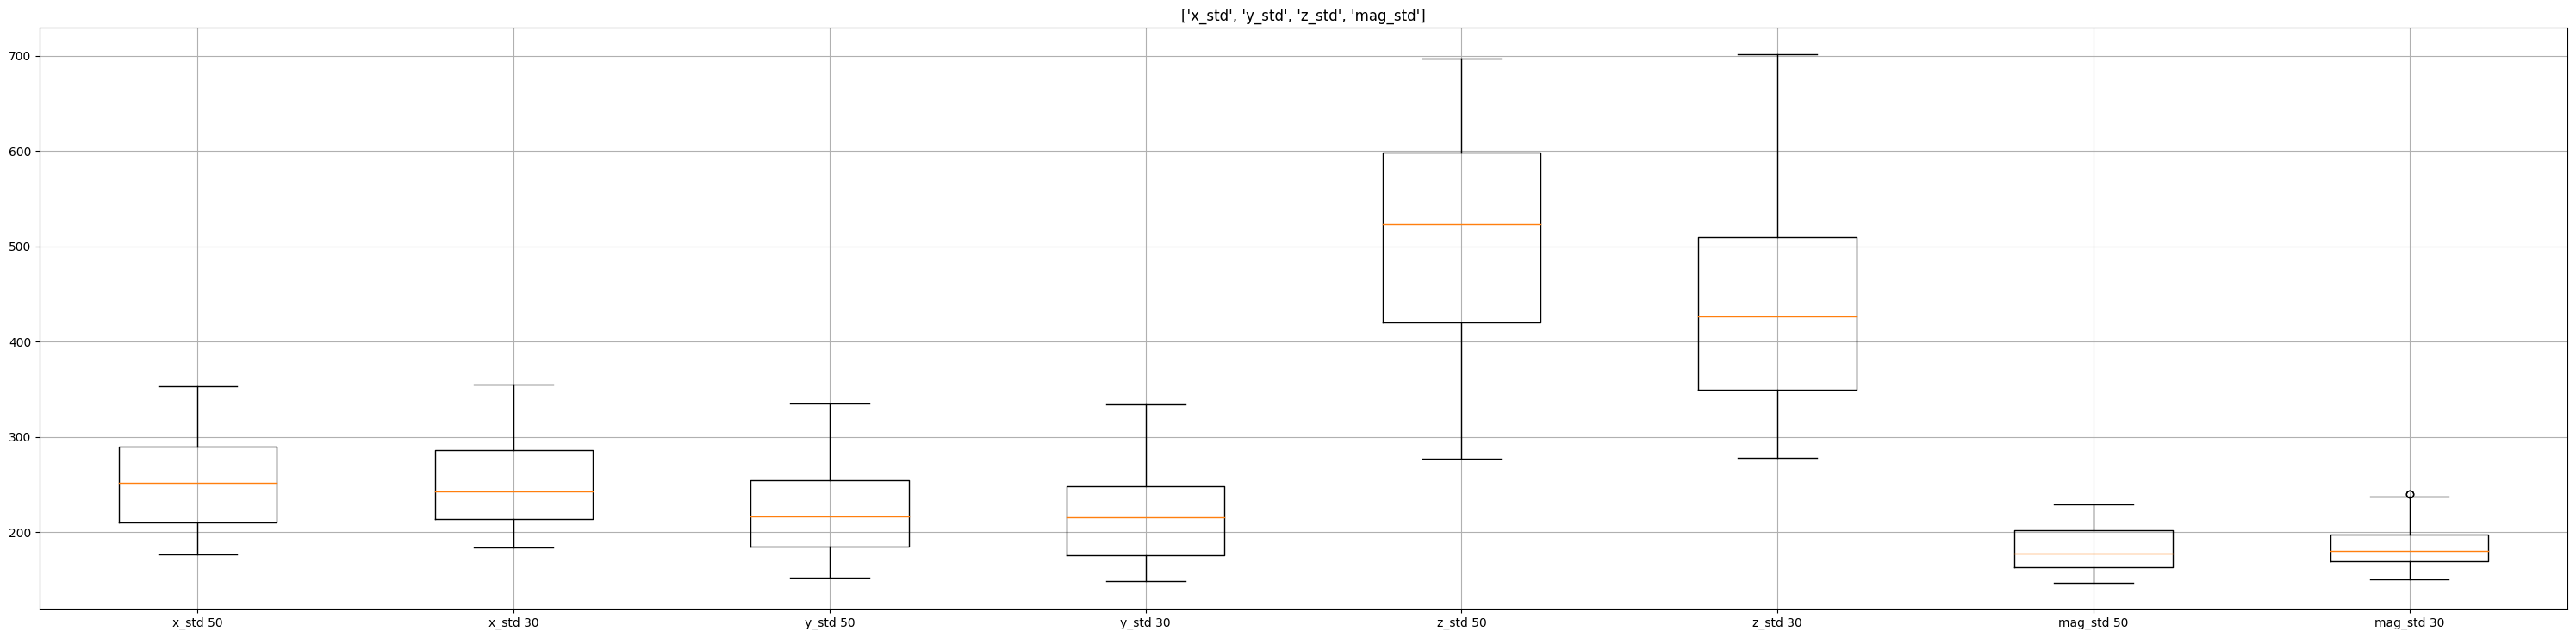

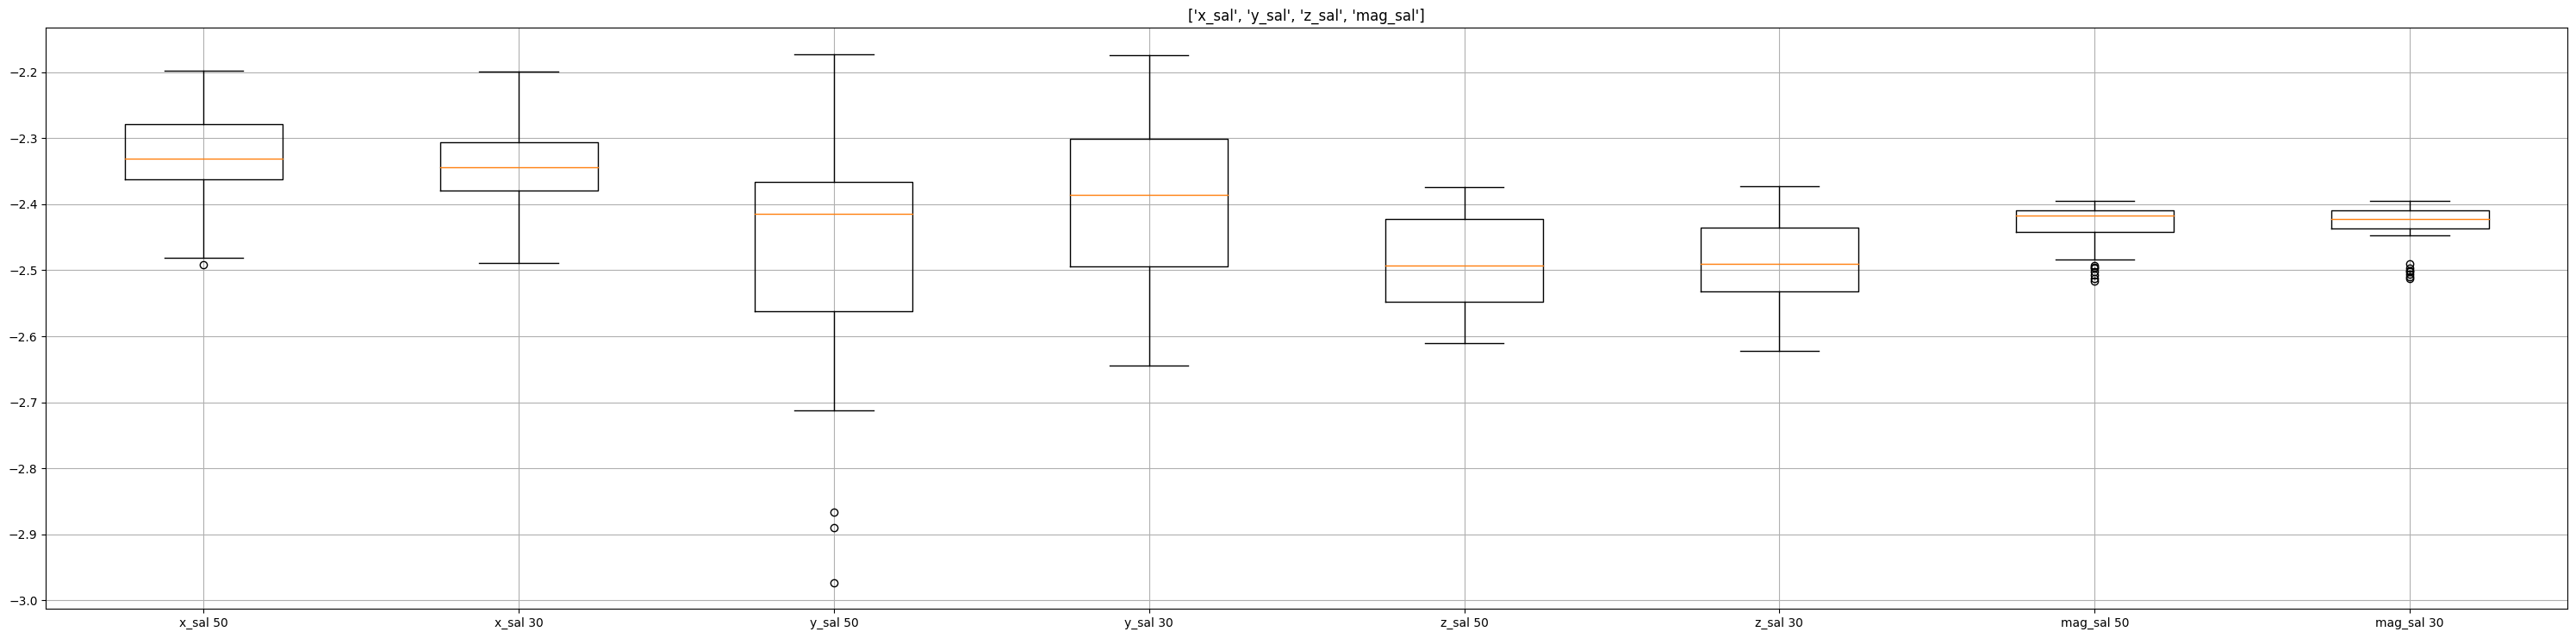

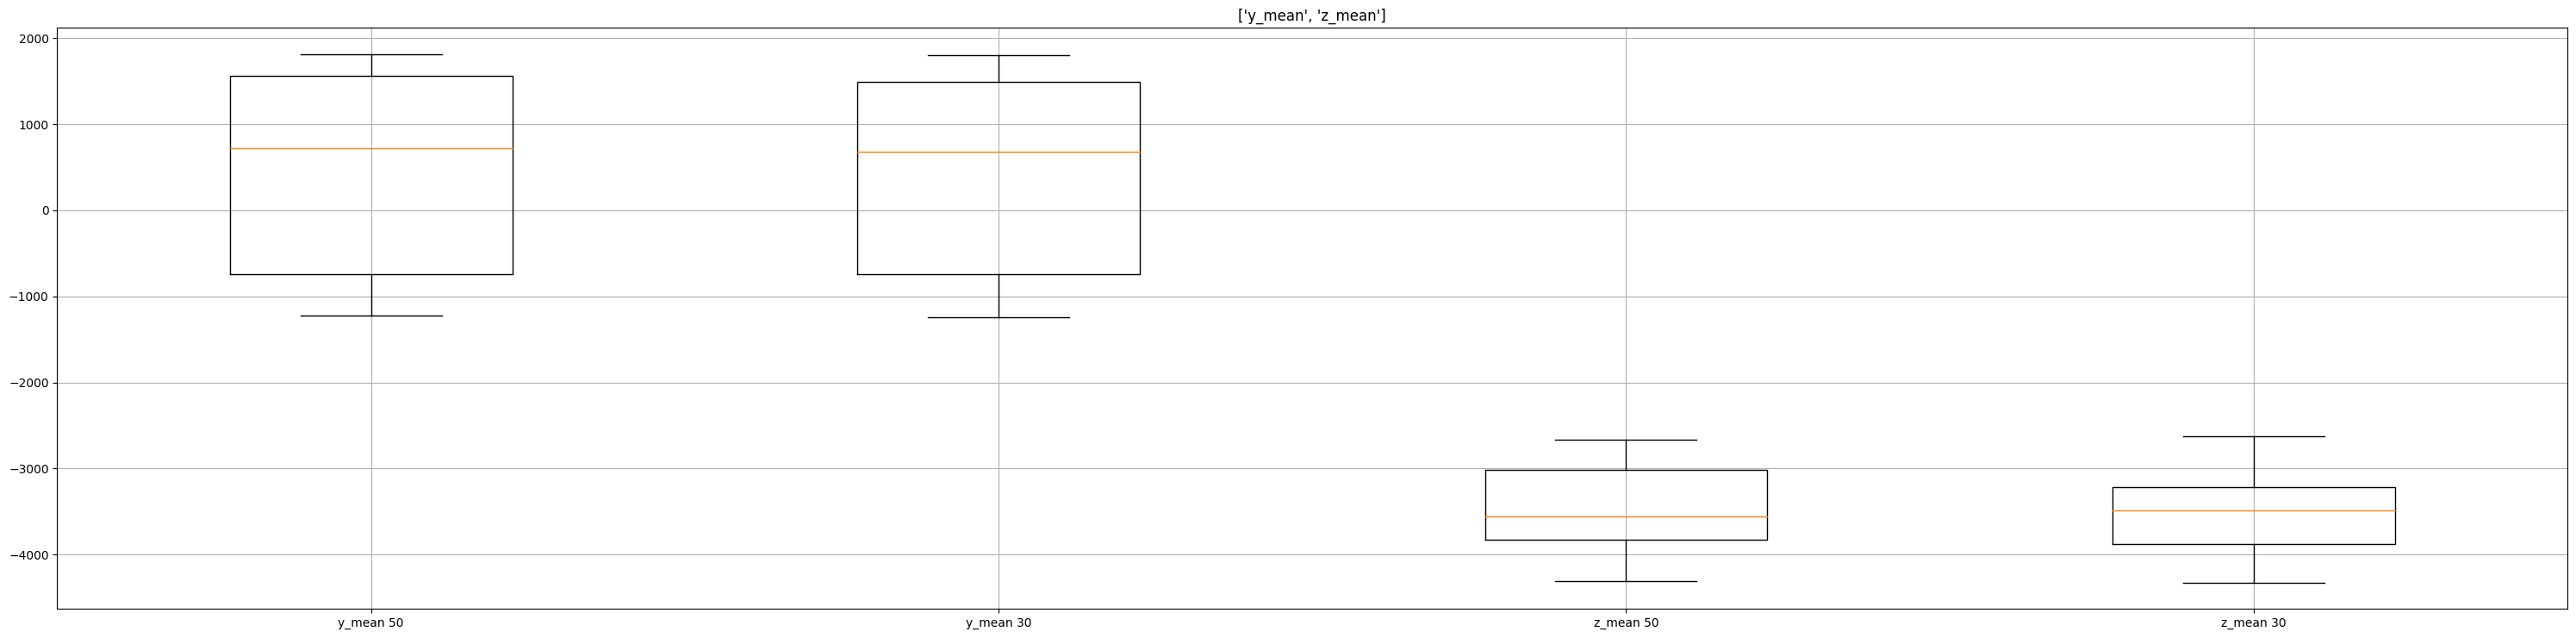

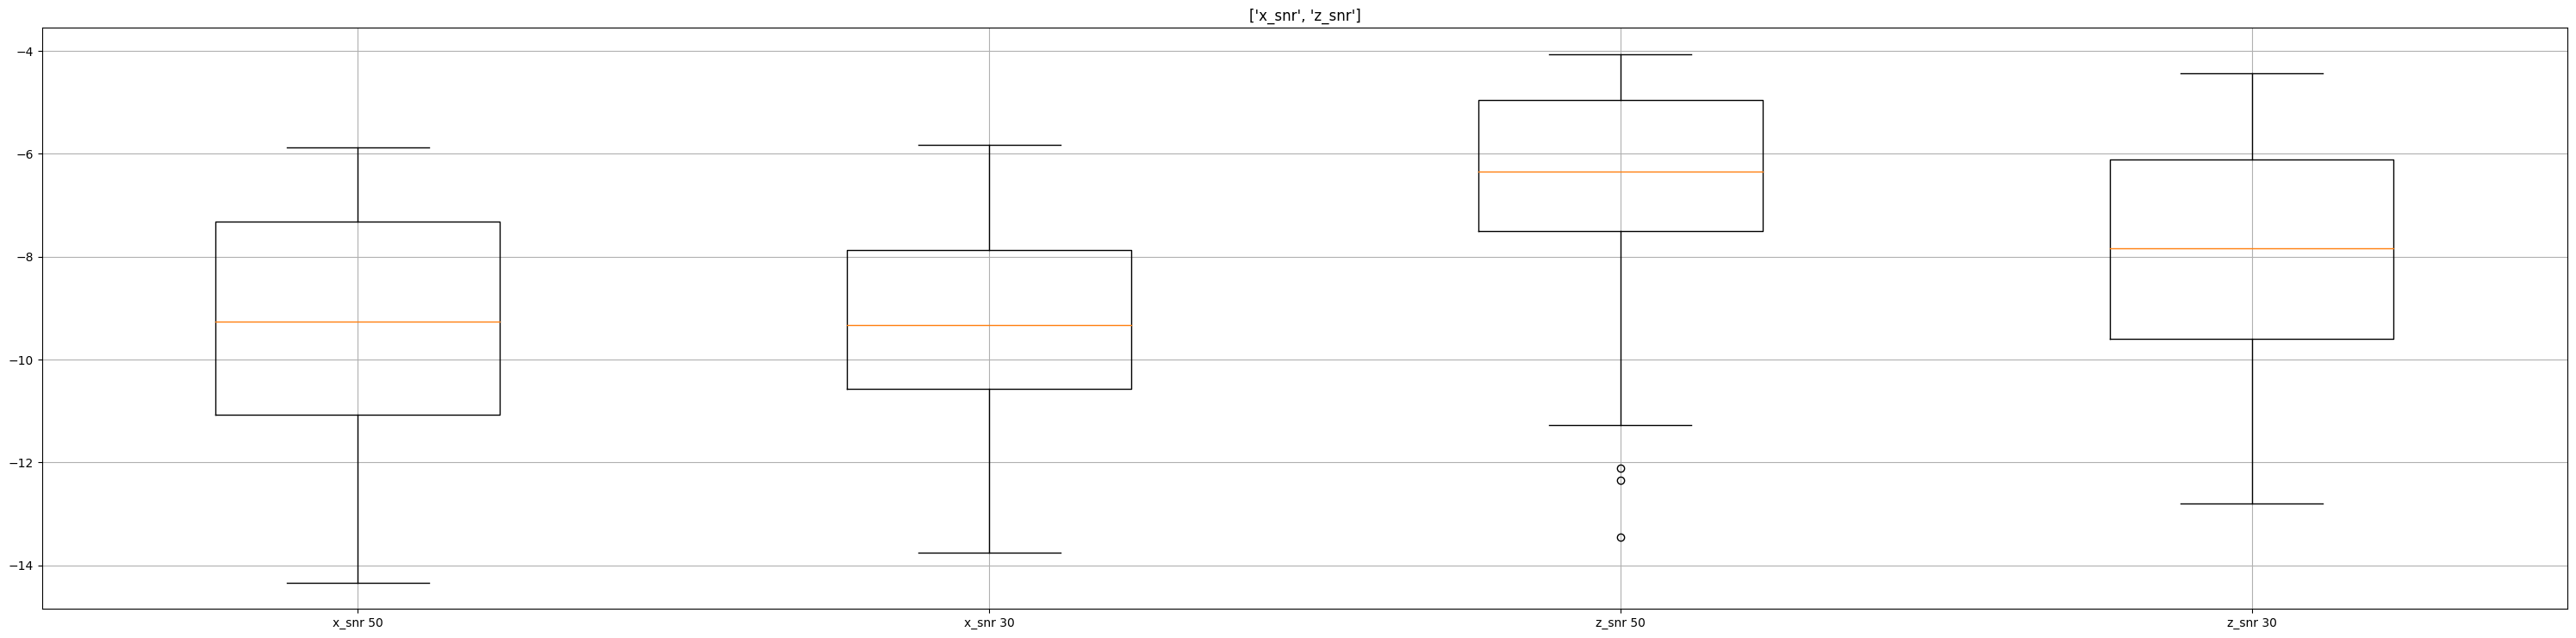

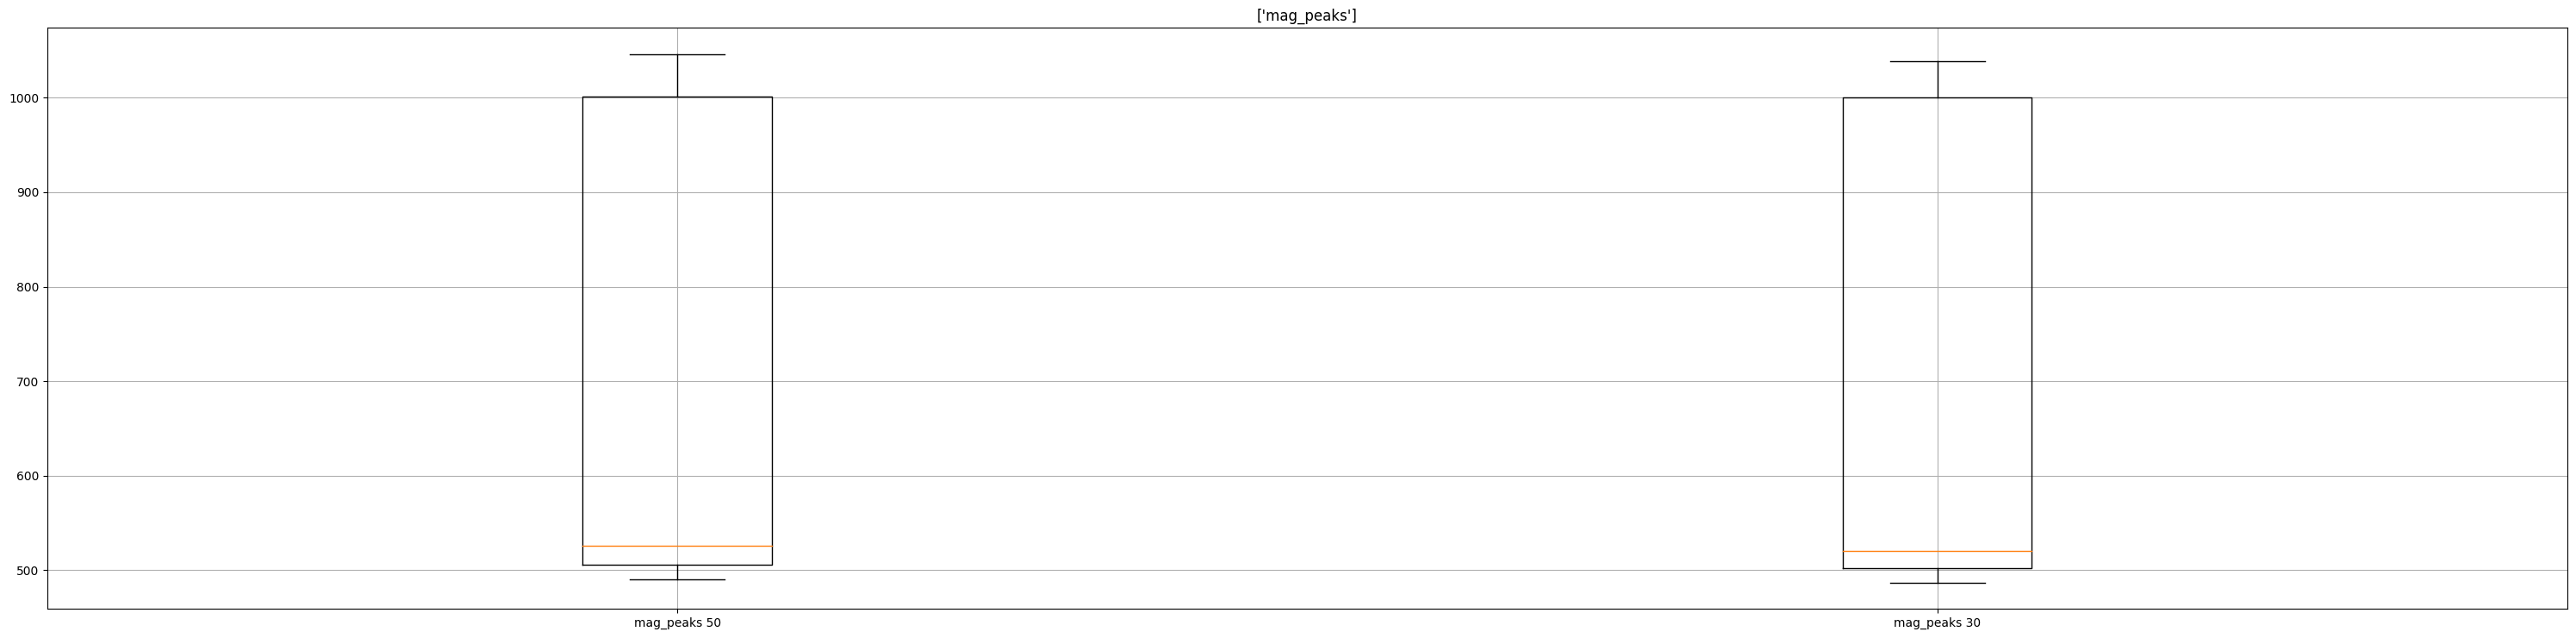

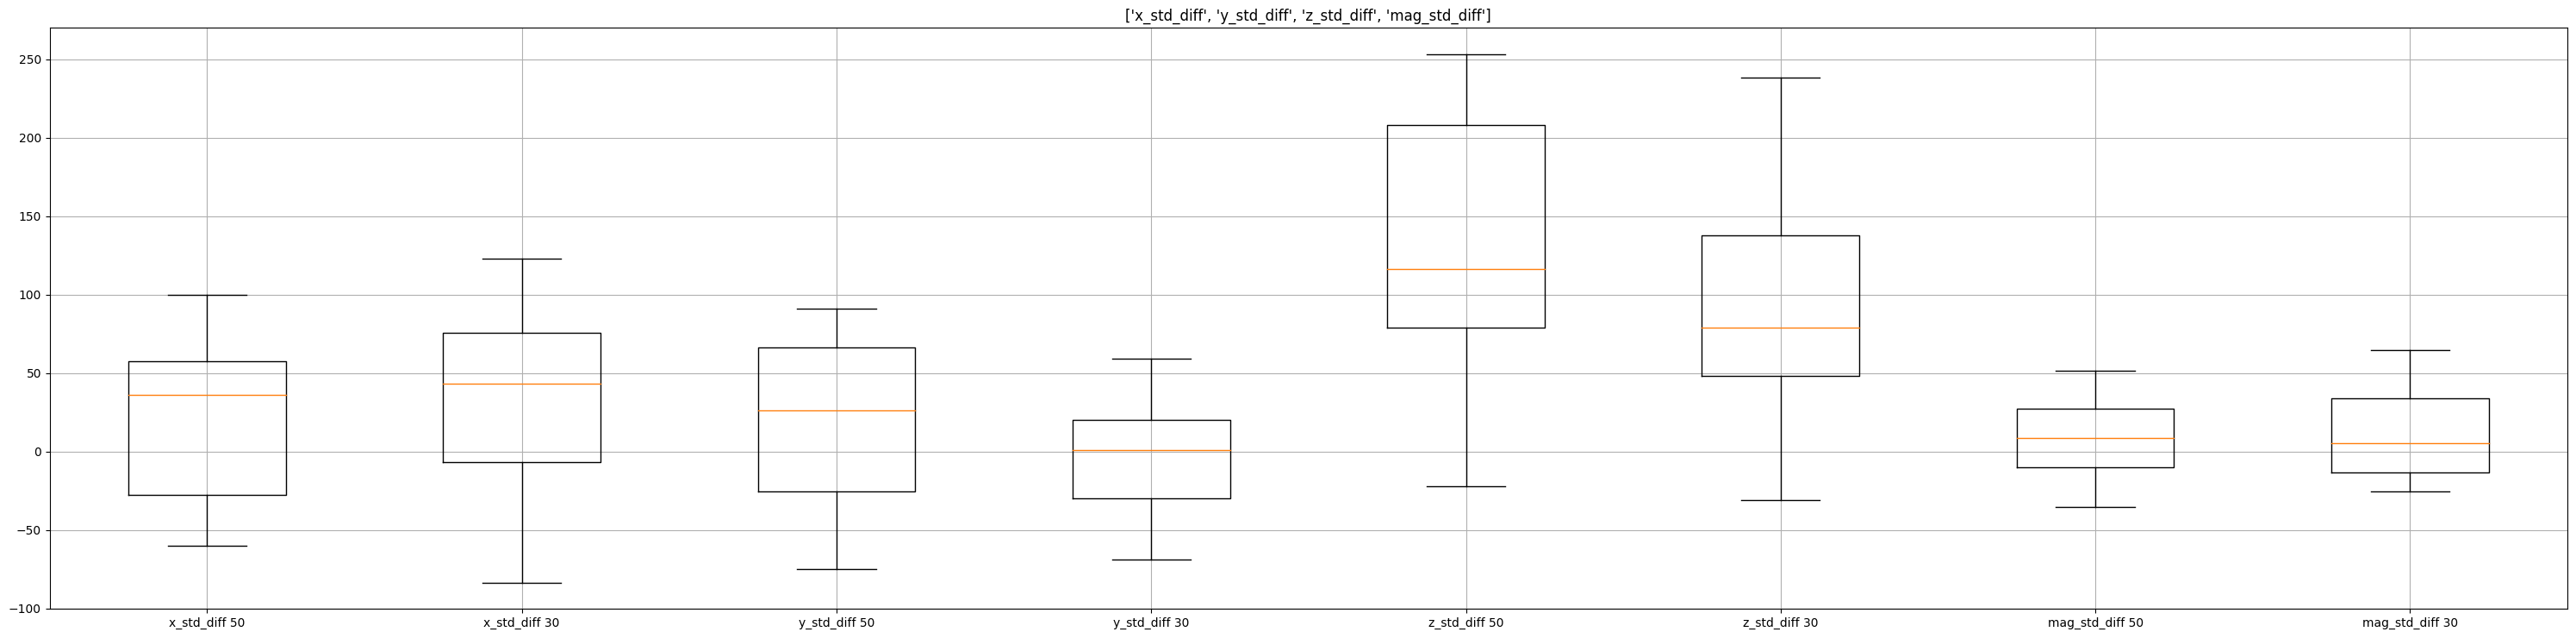

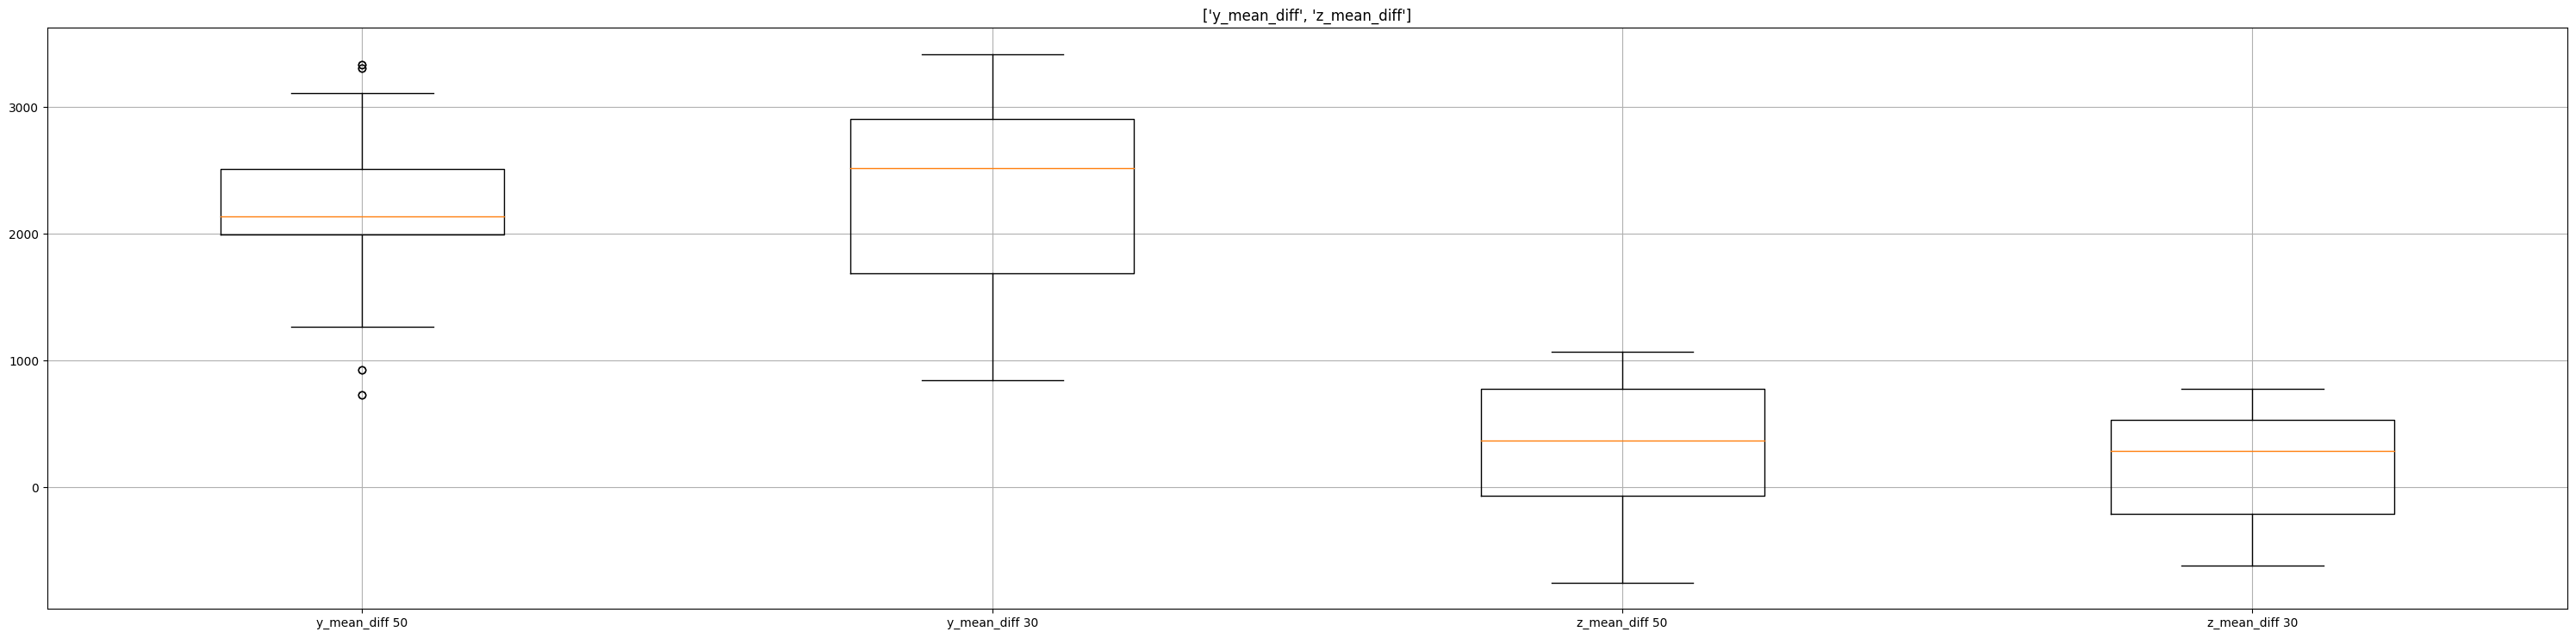

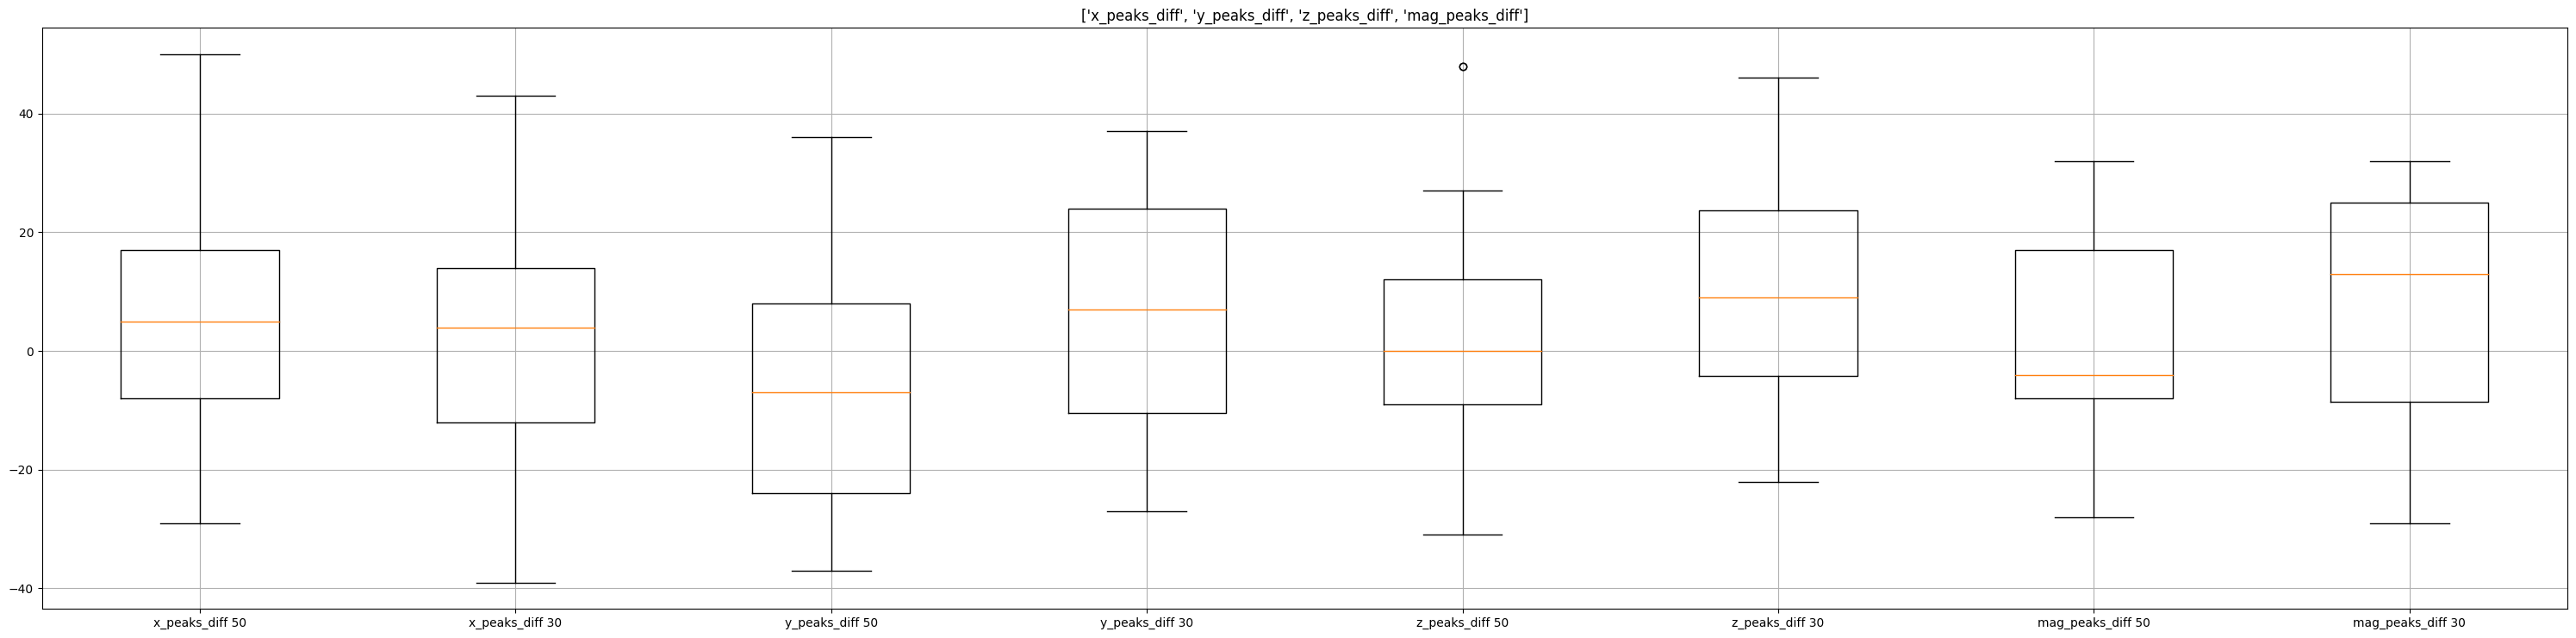

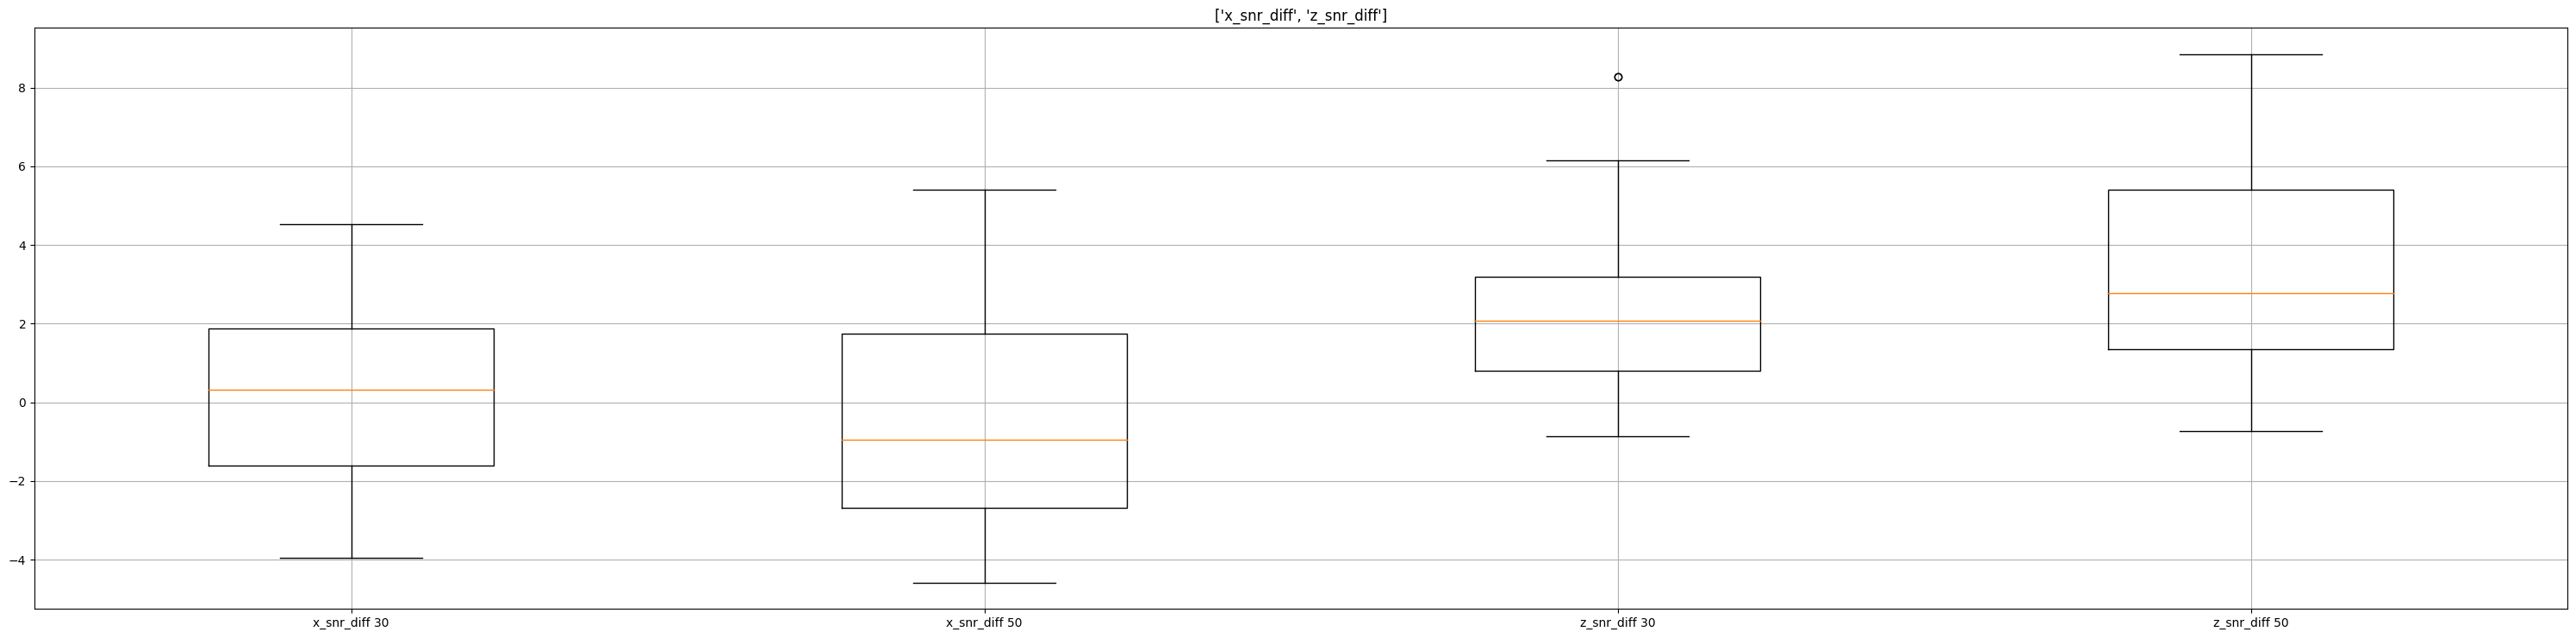

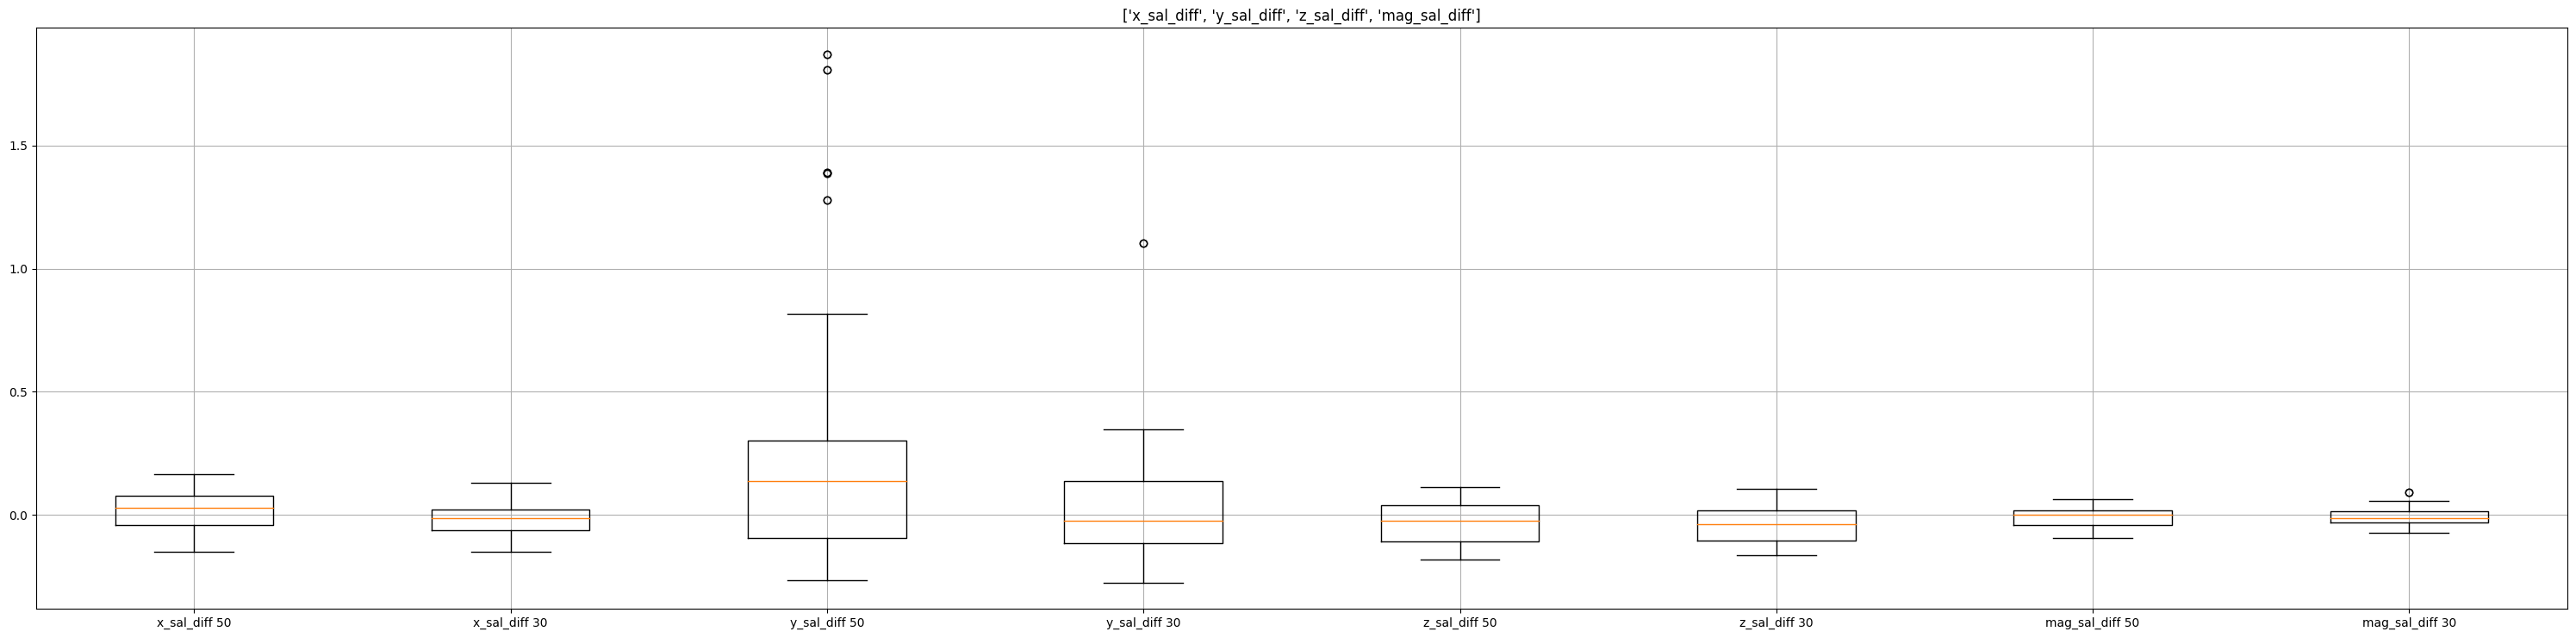

In [20]:
plot_feature_columns(drift_feature_df,'std')
plot_feature_columns(drift_feature_df,'sal')
box_plot_columns(drift_feature_df, 'age_group', ['y_mean','z_mean'])
box_plot_columns(drift_feature_df, 'age_group', ['x_snr','z_snr'])
box_plot_columns(drift_feature_df, 'age_group', ['mag_peaks'])
box_plot_columns(drift_feature_df, 'age_group', ['x_std_diff','y_std_diff','z_std_diff','mag_std_diff'])
box_plot_columns(drift_feature_df, 'age_group', ['y_mean_diff','z_mean_diff'])
box_plot_columns(drift_feature_df, 'age_group', ['x_peaks_diff','y_peaks_diff','z_peaks_diff','mag_peaks_diff'])
box_plot_columns(drift_feature_df, 'age_group', ['x_snr_diff','z_snr_diff'])
box_plot_columns(drift_feature_df, 'age_group', ['x_sal_diff','y_sal_diff','z_sal_diff','mag_sal_diff'])

# ML Models

In [21]:
results = {}

In [22]:
feature_keys = ['z_std','z_snr','y_std_diff','z_std_diff','y_mean_diff','y_peaks_diff','x_snr_diff','y_sal_diff']
class_key = ['age_group']

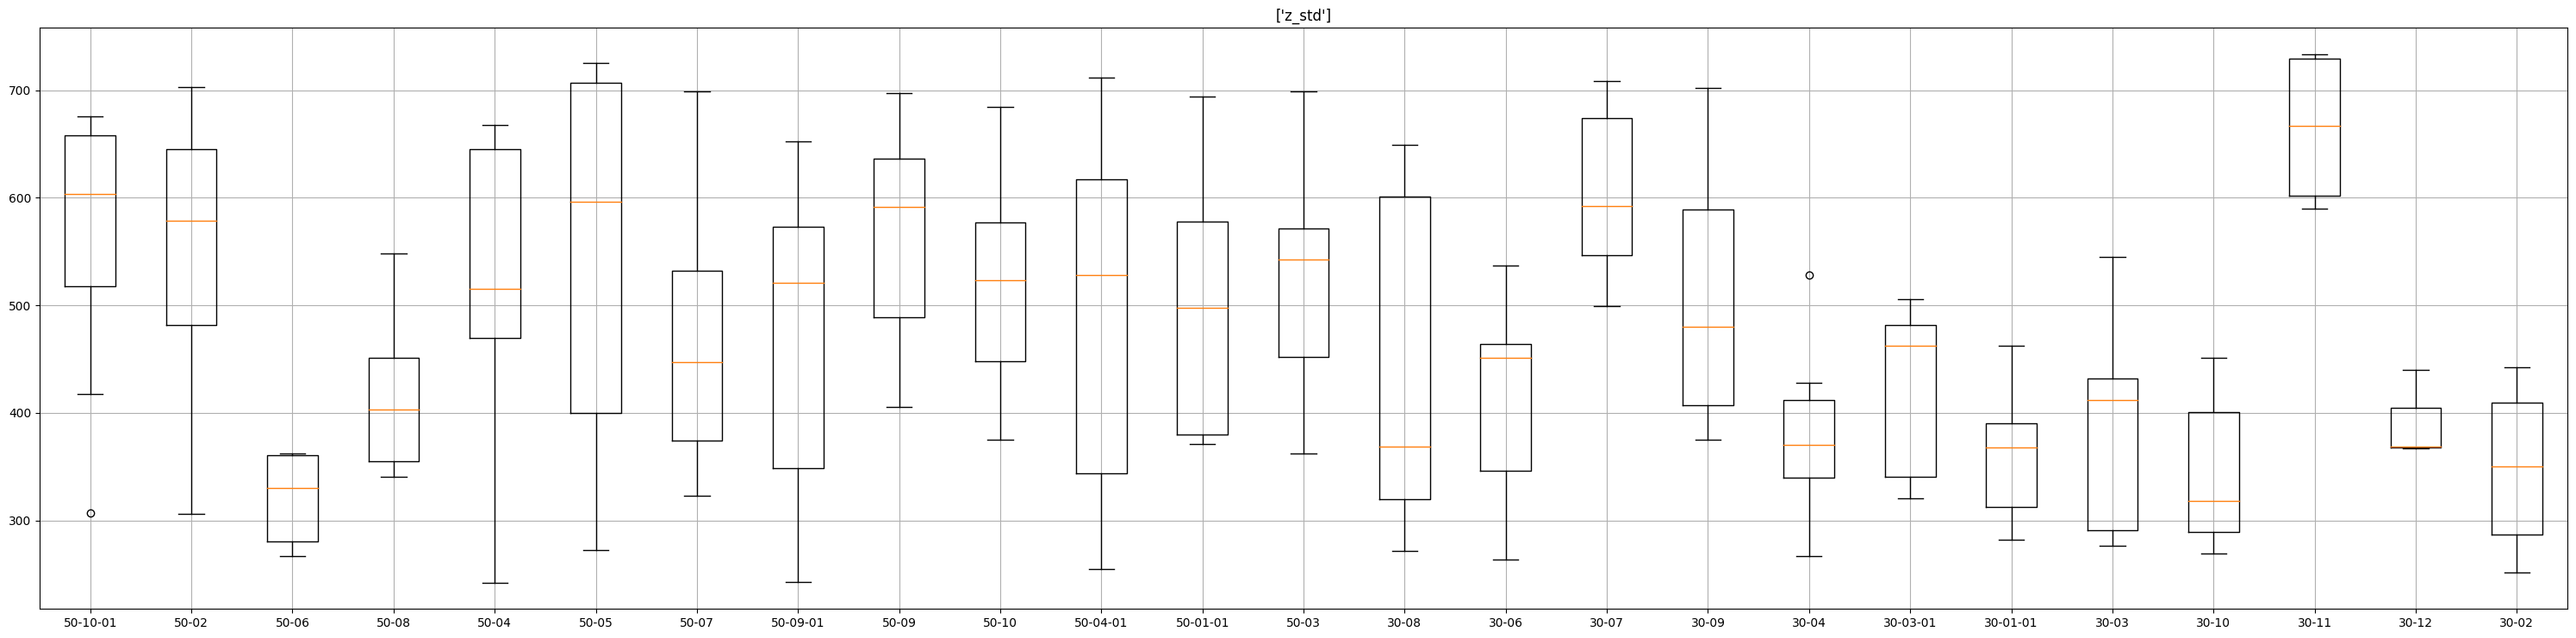

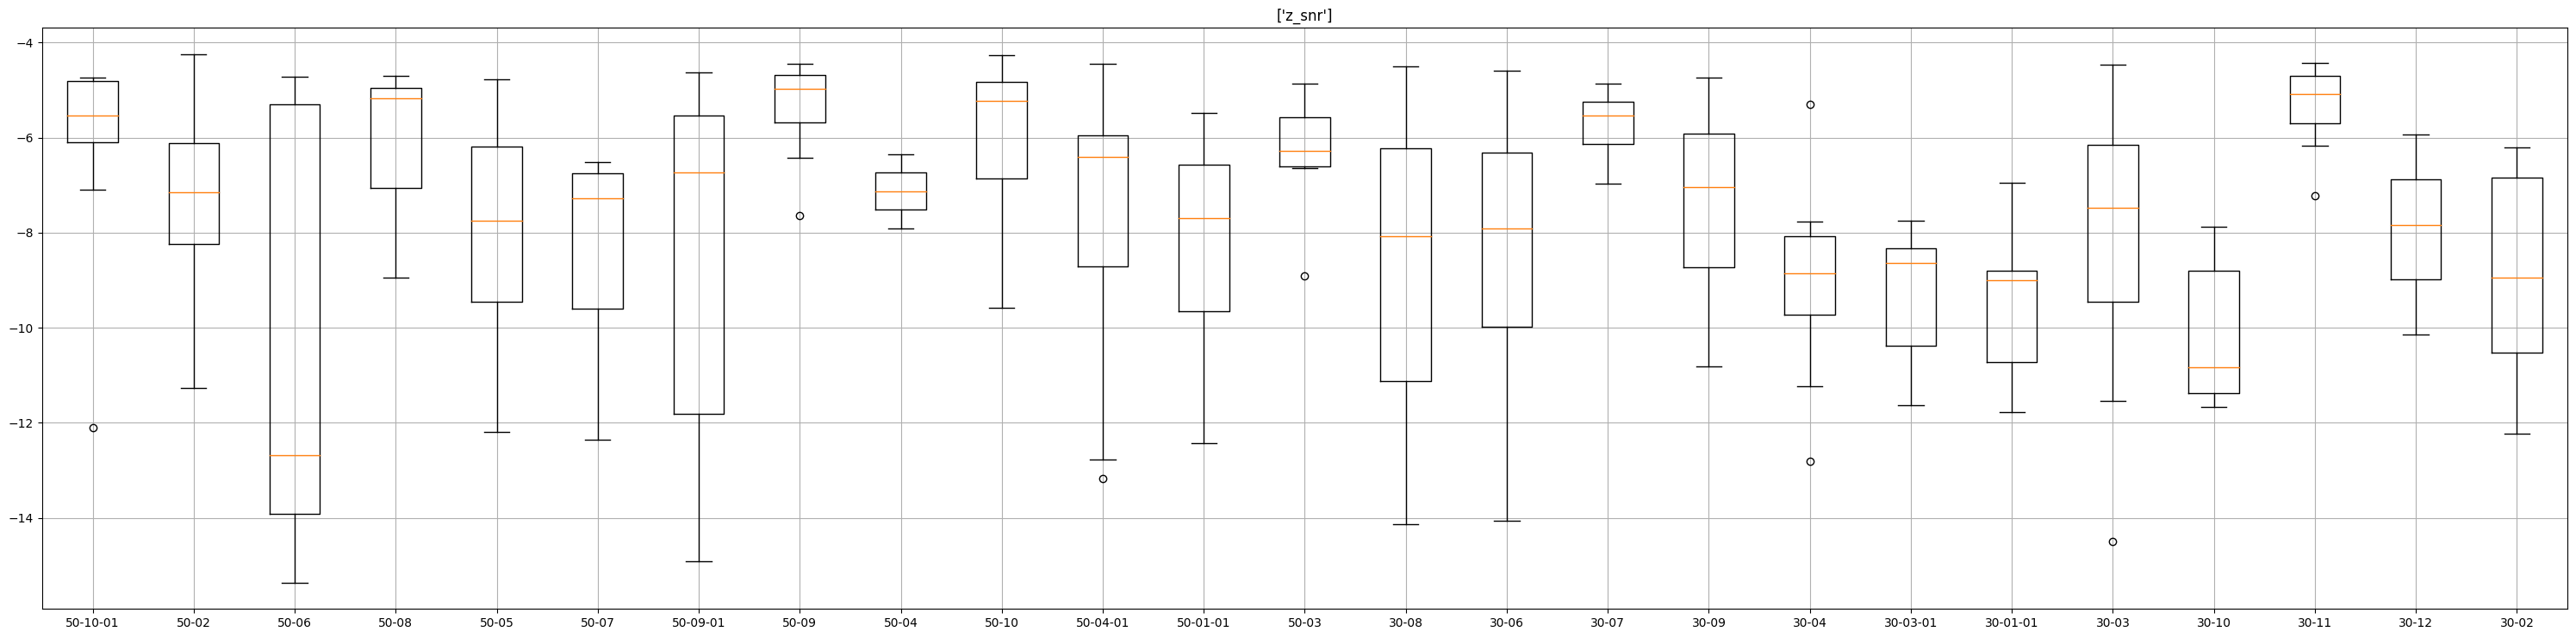

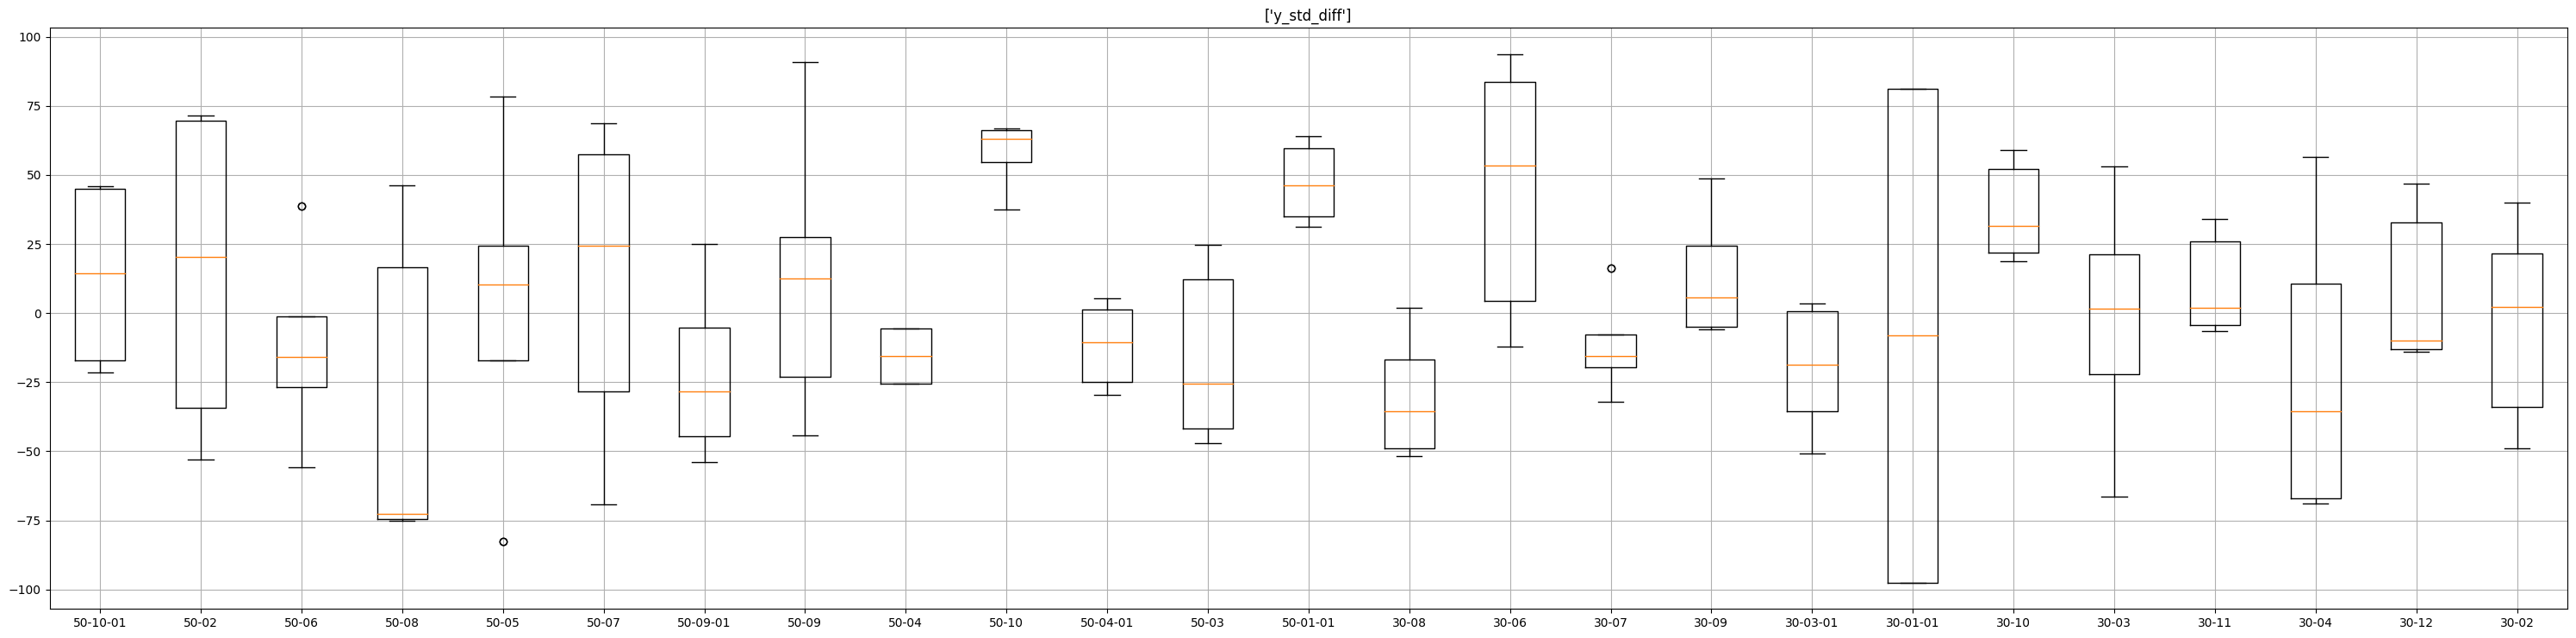

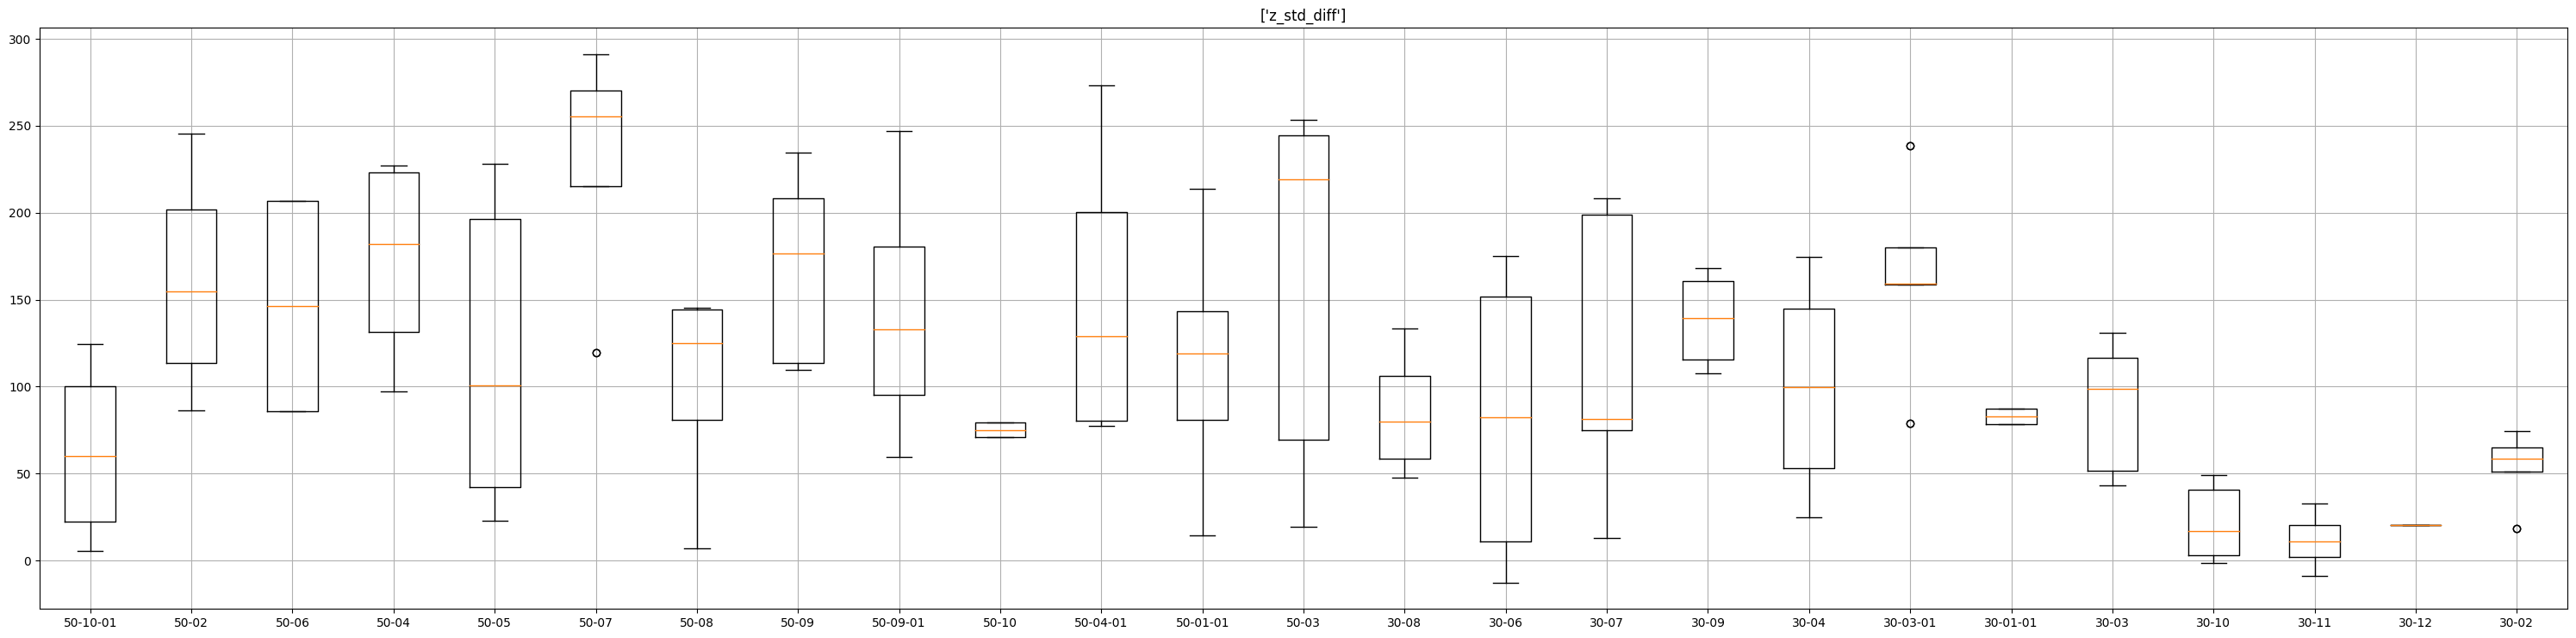

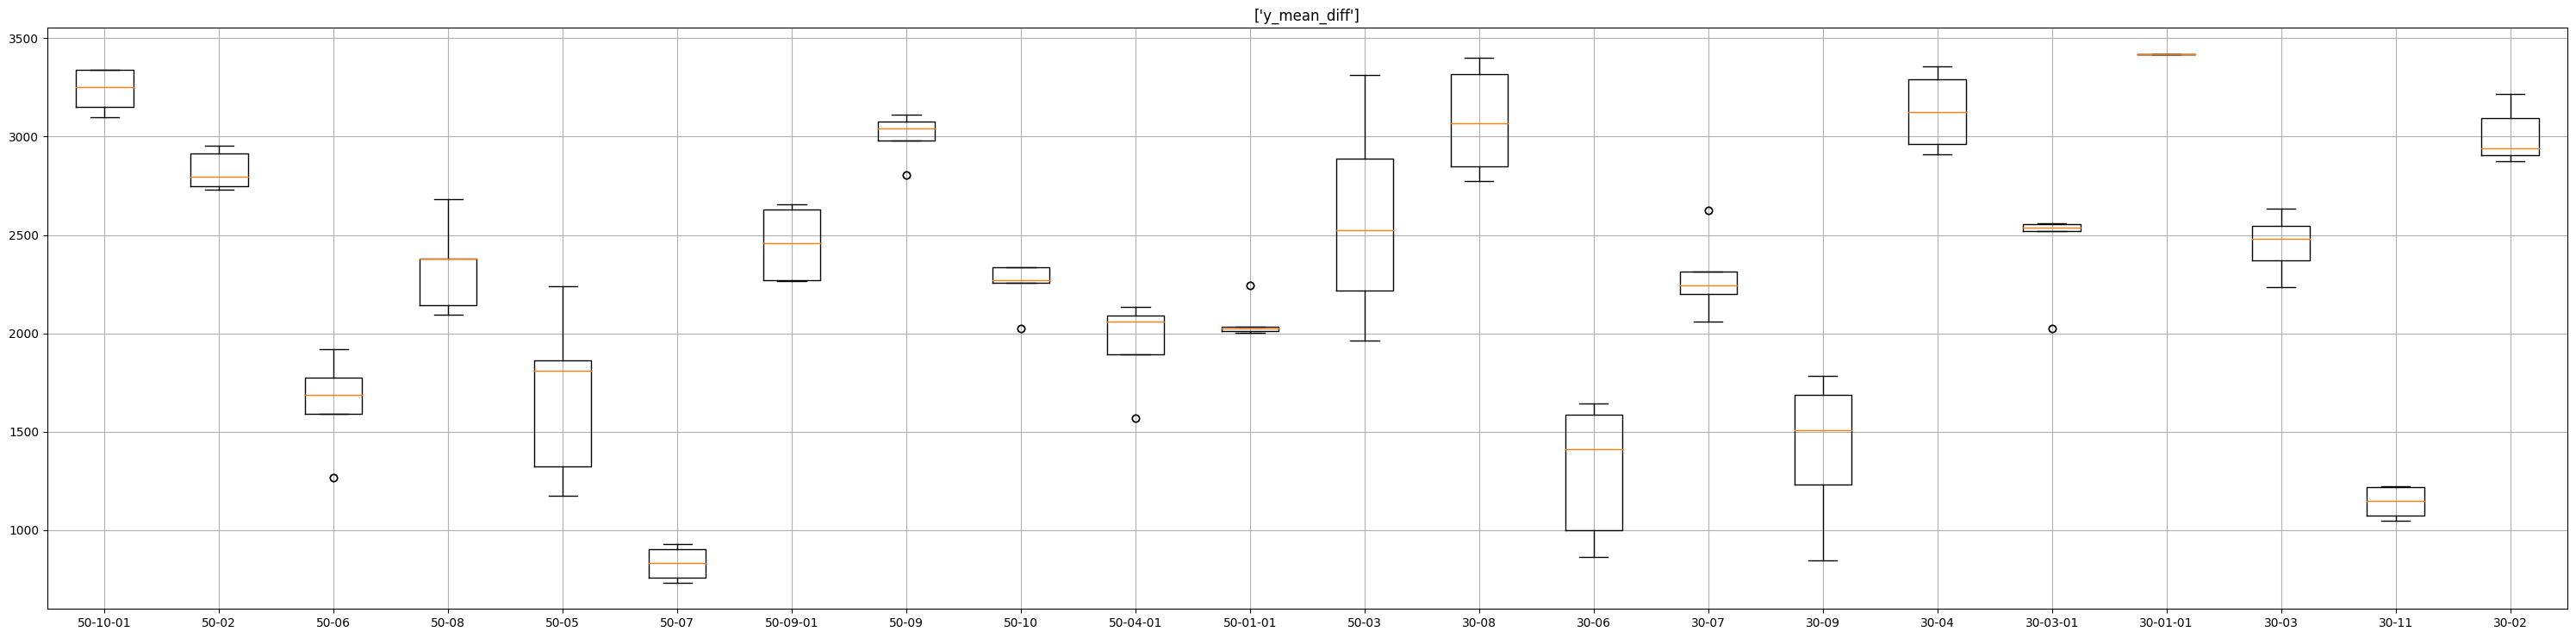

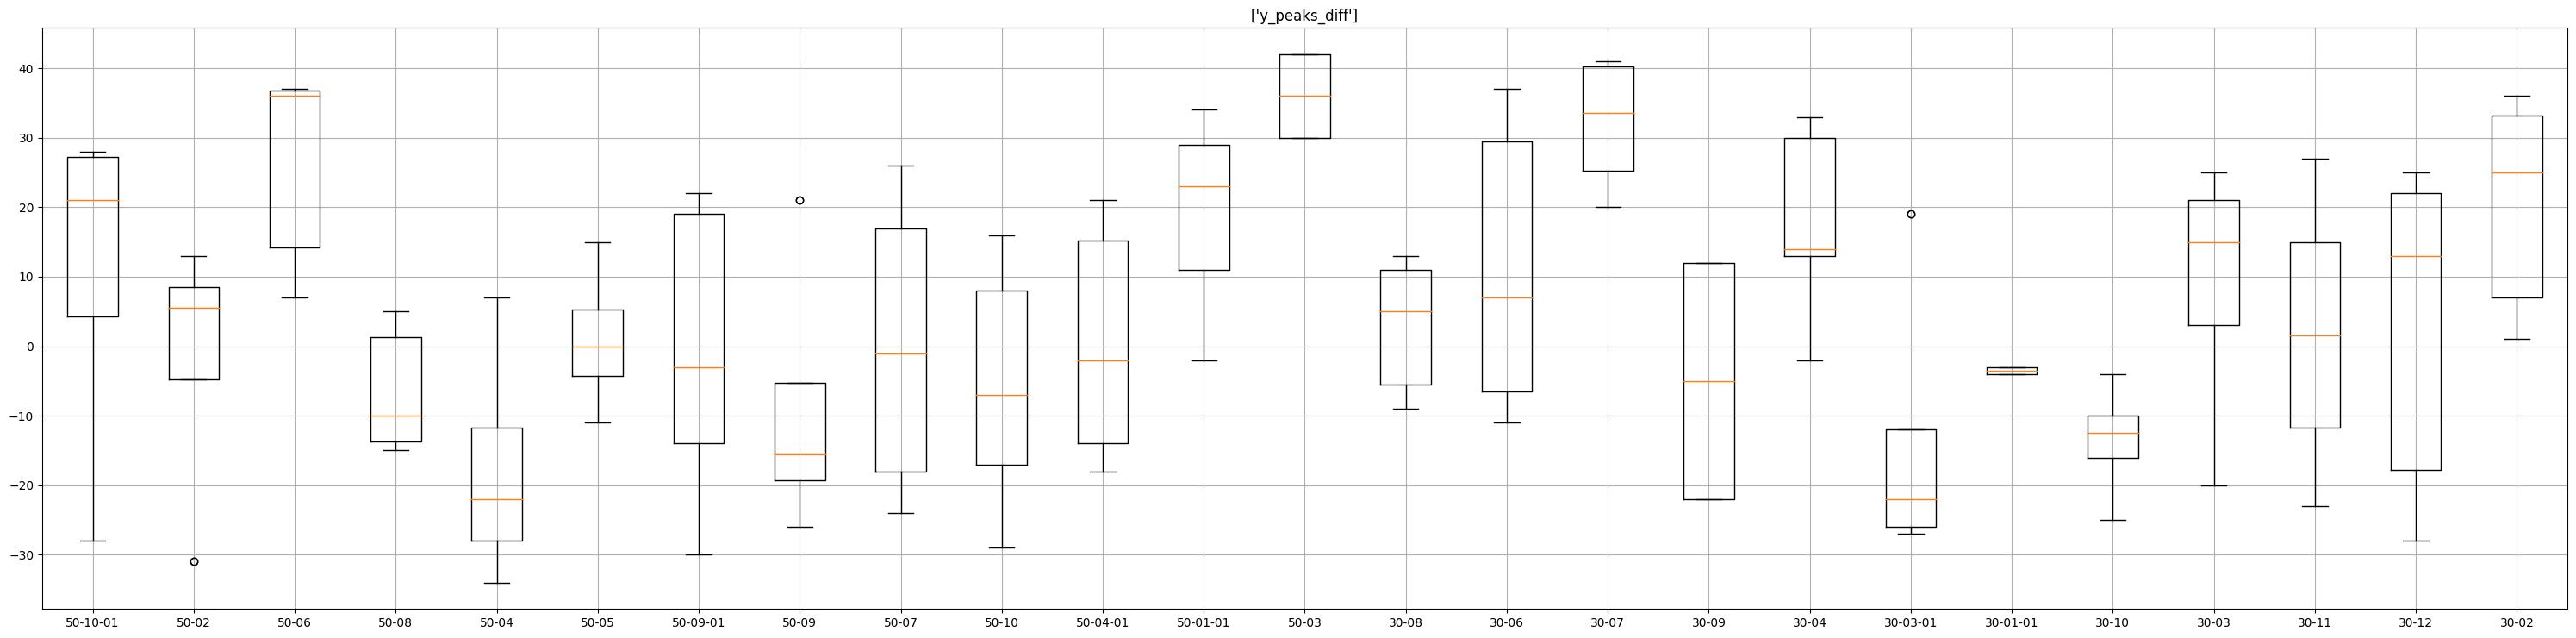

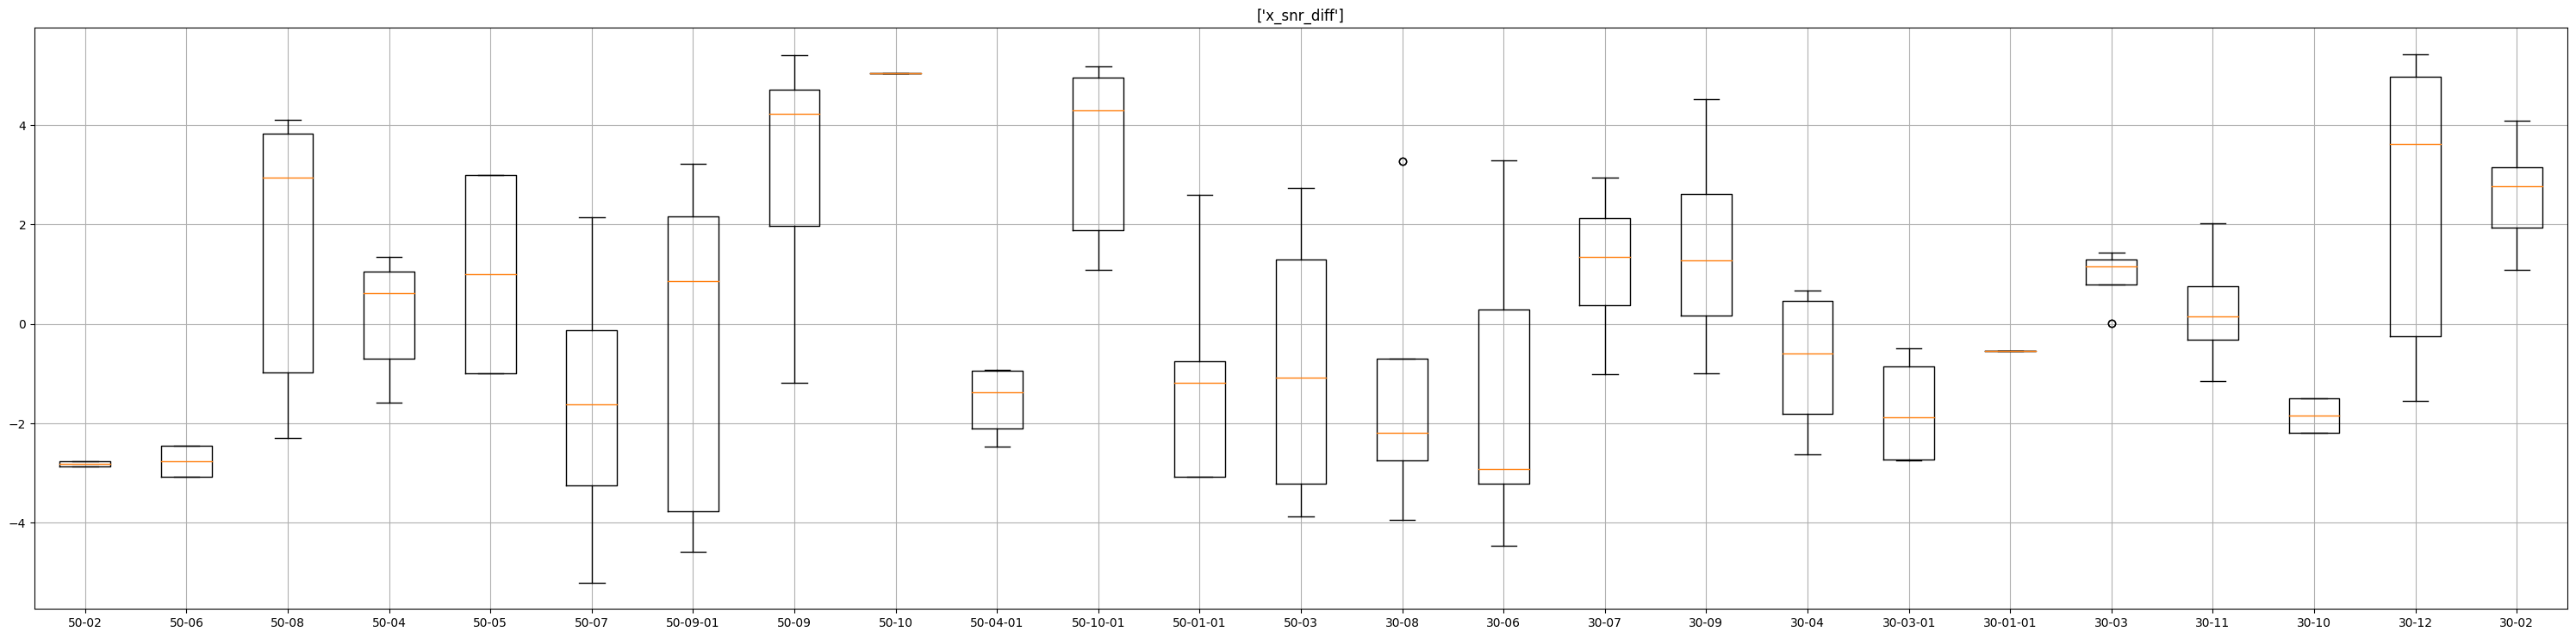

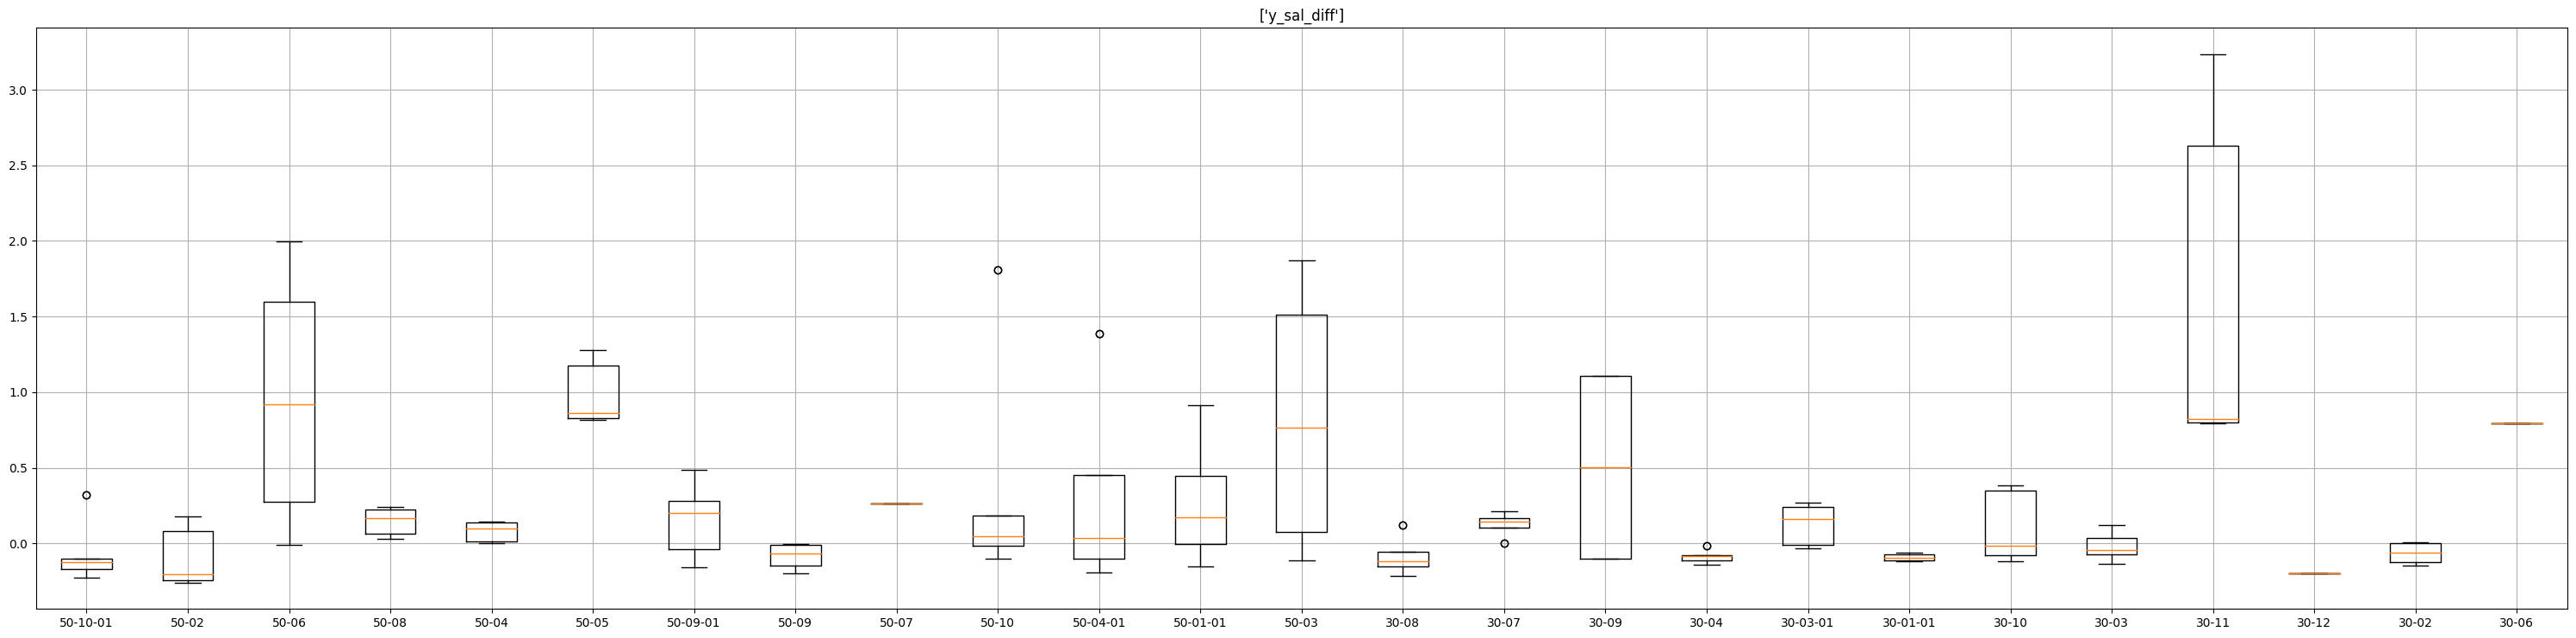

In [32]:
drift_feature_df = drift_feature_df.sort_values(by='age_group')
for feature in feature_keys:
    box_plot_columns(drift_feature_df, 'subject',[feature],show_column_in_label=False)

In [24]:
drift_feature_df['age_group'].replace(to_replace=30,value=1,inplace=True)
drift_feature_df['age_group'].replace(to_replace=50,value=0,inplace=True)

## Principal Component Analysis

In [25]:
principal_components_df = principal_component_analysis(drift_feature_df, feature_keys)

<Figure size 640x480 with 0 Axes>

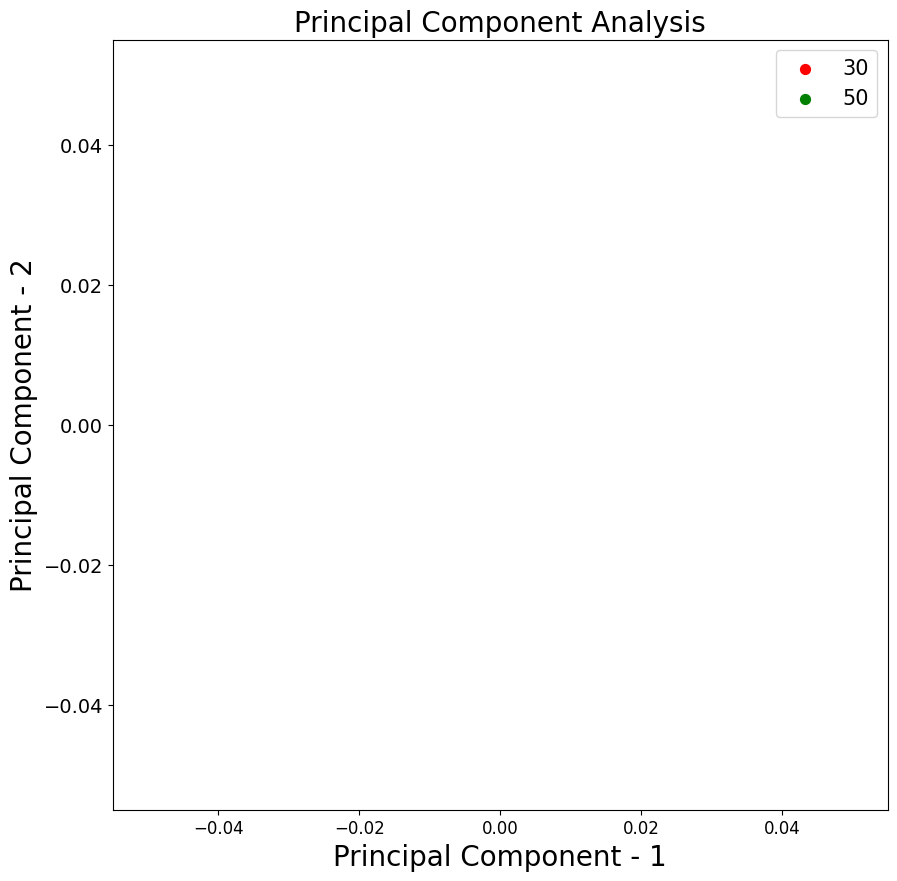

In [26]:
plot_principal_component_analysis(drift_feature_df, principal_components_df.reset_index(drop=False), 'age_group', [30,50])

## Run Algorithms on extracted Features

In [27]:
feature_results = run_feature_algorithms(drift_feature_df, feature_keys)
results.update(feature_results)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

dummy single accuracy: [0.5319148936170213, 0.44680851063829785, 0.5319148936170213, 0.48936170212765956, 0.46808510638297873, 0.46808510638297873, 0.5106382978723404, 0.5957446808510638, 0.5106382978723404, 0.5319148936170213]
dummy mean accuracy: 0.5085106382978722
kmeans single accuracy: [0.9375, 0.962962962962963, 0.962962962962963, 0.925, 0.95, 0.9722222222222222, 0.9166666666666666, 0.8958333333333334, 0.0714285714285714, 0.92]
kmeans mean accuracy: 0.851457671957672
decision_tree single accuracy: [0.6808510638297872, 0.8723404255319149, 0.7872340425531915, 0.851063829787234, 0.8085106382978723, 0.8085106382978723, 0.7872340425531915, 0.851063829787234, 0.9361702127659575, 0.8936170212765957]
decision_tree mean accuracy: 0.827659574468085
k_neighbors single accuracy: [0.7021276595744681, 0.7872340425531915, 0.7446808510638298, 0.7659574468085106, 0.723404255319149, 0.7659574468085106, 0.7659574468085106, 0.7446808510638298, 0.7446808510638298, 0.7872340425531915]
k_neighbors mean

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Time Series Pre-Processing

In [28]:
def extract_sequences_by_device(session_df):
    device_sequences = {}
    device_sequences_length = {}
    for device in session_df['device'].unique():
        device_df = session_df[session_df['device']==device]
        sequence = device_df[['x','y','z','mag']].values
        device_sequences[device] = sequence
        device_sequences_length[device] = len(sequence)
    return device_sequences, device_sequences_length


In [29]:
def build_session_sequence(device_sequences, device_sequences_length):
    final_sequence = []
    min_length = min(device_sequences_length.values())
    for device in device_sequences.keys():
        device_sequence = device_sequences[device]
        for index in range(min_length):
            device_sequence_entry = device_sequence[index]
            if len(final_sequence) <= index:
                final_sequence.append(device_sequence_entry)
            else:
                current_sequence_entry = final_sequence[index]
                new_sequence_entry = list(np.append(current_sequence_entry,device_sequence_entry))
                final_sequence[index] = new_sequence_entry
    return final_sequence

In [30]:
def extract_sequences_and_labels(df):
    sequences = []
    labels = []
    length = []
    for uuid in df['uuid'].unique():
        current_df = df[df['uuid']==uuid]
        labels.append(current_df['age_group'].max())
        device_sequences, device_sequences_length = extract_sequences_by_device(current_df)
        session_sequence = build_session_sequence(device_sequences, device_sequences_length)
        sequences.append(session_sequence)
        length.append(len(session_sequence))
    target_length = np.int_(pd.Series(length).quantile(0.65))
    final_sequences = align_sequences_to_same_length(sequences,target_length)
    return np.stack(final_sequences), labels

## Run Time Series Algorithm

In [31]:
time_series_results = run_time_series_algorithms(drift_df, compile_sequences_function=extract_sequences_and_labels)
results.update(time_series_results)

2023-01-13 09:18:09.207677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

## ML Results

In [ ]:
results